====================================================================================================================
## **TEAM: GWENCHANA**
#### **1. Brandon Ritchie Yang - 2602075491**
#### **2. Davin Edbert Santoso - 2602067086**
#### **3. Steve Marcello Liem - 2602071410**
====================================================================================================================

# **About Dataset**

The provided dataset comprises synthesized financial transactions generated by **IBM (International Business Machines Corporation)**. It encapsulates interactions among individuals, businesses, and banks. Individuals interact with other individuals and businesses, while businesses engage with other businesses and individuals. These interactions encompass various forms, such as consumer purchases of goods and services, industrial supply orders, salary payments, loan repayments, among others.

Financial transactions predominantly occur through banks, where both the payer and recipient possess accounts, ranging from traditional checking accounts to credit cards and even cryptocurrencies like Bitcoin. Within this dataset model, a small subset of individuals and businesses is involved in criminal activities, including smuggling, illegal gambling, extortion, and similar behaviors. These criminals acquire funds from such illicit activities and subsequently attempt to conceal the illegal fund sources through a series of financial transactions.

This dataset models the complete money laundering cycle:
- Placement: Involves the introduction of funds from illegal sources, such as smuggling.
- Layering: Entails the mingling of illegal funds within the financial system.
- Integration: Signifies the expenditure of these illegal funds.

The aim is to employ data analysis methodologies to assist authorities in identifying and distinguishing potential instances of money laundering among the financial transactions recorded within this dataset.

# **Data Reading & Sampling**

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Undersampling** is a technique used to address class imbalance in a dataset, commonly employed when the proportion between classes is significantly skewed. 

In the context of financial transactions where only a **small portion** is flagged as **money laundering**, undersampling involves reducing the abundance of the majority class (non-money laundering transactions) to match the quantity of the minority class (money laundering transactions). This process randomly selects and removes instances from the majority class until a balanced representation between both classes is achieved. By doing so, it ensures that the model is trained on a more proportionate dataset, mitigating the impact of class imbalance and improving the model's ability to accurately learn and predict across both classes.

In [253]:
#from imblearn.under_sampling import RandomUnderSampler

#chunk_size = 100000  
#rus = RandomUnderSampler(random_state=42)
#undersampled_data = pd.DataFrame()

#for chunk in pd.read_csv('D:\COMPETITION\DSC OLYMPIAD\MACHINE LEARNING\HI-Large_Trans.csv', chunksize=chunk_size):
#    X_chunk = chunk.drop('Is Laundering', axis=1)
#    y_chunk = chunk['Is Laundering']
    
#    if len(y_chunk.unique()) > 1:
#        X_rus, y_rus = rus.fit_resample(X_chunk, y_chunk)
#        chunk_rus = pd.concat([X_rus, y_rus], axis=1)
#        undersampled_data = pd.concat([undersampled_data, chunk_rus], ignore_index=True)     

The process of running this operation might **require a significant amount of time**, ranging from **5 to 10 minutes**, contingent upon the computational power of the GPU utilized. The duration can be influenced by the complexity of the task, the size of the dataset, and the efficiency of the hardware employed for processing. **Please be advised** that due to the substantial size of the dataset and the intricacy of the computational procedures involved, the **execution time might be prolonged**. The timeframe mentioned is an estimate and may vary based on the specific GPU specifications and the intricacies of the operations being performed.

In [254]:
#df = undersampled_data

In [255]:
#df.to_csv('HI-Large_Trans_Sampled.csv', index=False)

To **expedite the runtime**, utilizing undersampling to **create a new CSV file** with downsampled data is a sound approach. Undersampling involves reducing the size of the dataset by balancing the class distribution, especially in scenarios where the classes are imbalanced. By creating a new CSV file with the downsampled data, subsequent processes can simply read from this new CSV, thereby streamlining the operations and enhancing efficiency during runtime. This downsampling technique enables a more manageable dataset for analysis or model training, contributing to quicker processing times in subsequent tasks without compromising the integrity of the information.

In [256]:
df = pd.read_csv('D:\COMPETITION\DSC OLYMPIAD\MACHINE LEARNING\HI-Large_Trans_Sampled.csv')

# **Data Understanding**

In [257]:
df.head(10)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/08/01 00:11,36738,8033CC480,36738,8033CC480,3282.69,US Dollar,3282.69,US Dollar,Reinvestment,0
1,2022/08/01 00:19,70,100428660,8381,8035B3E00,27815.14,US Dollar,27815.14,US Dollar,Cheque,1
2,2022/08/01 00:17,27076,814F9F6E0,27076,814F9F6E0,207177.21,US Dollar,207177.21,US Dollar,Reinvestment,0
3,2022/08/01 00:16,347207,812A8DFA0,347207,812A8DFA0,1479.74,US Dollar,1479.74,US Dollar,Reinvestment,0
4,2022/08/01 00:04,21710,80789D110,42935,811EEF2A0,151.27,US Dollar,151.27,US Dollar,Credit Card,0
5,2022/08/01 00:24,221413,809BA19E0,15027,8104F8A40,2496.59,US Dollar,2496.59,US Dollar,Cash,0
6,2022/08/01 00:13,32425,80FC90C90,32425,80FC90C90,6.68,US Dollar,6.68,US Dollar,Reinvestment,0
7,2022/08/01 00:07,10542,80EAEAE10,10542,80EAEAE10,1466123.41,US Dollar,1466123.41,US Dollar,Reinvestment,0
8,2022/08/01 00:28,70,100428660,29630,814B11040,86532.59,US Dollar,86532.59,US Dollar,Cheque,1
9,2022/08/01 00:06,215275,816439360,235985,816439870,4163.80,US Dollar,4163.80,US Dollar,ACH,1


In [258]:
df.shape

(451092, 11)

In [259]:
df.columns

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')

In [260]:
df.columns = [col.replace(' ', '_').replace('.', '_').lower() for col in df.columns]
df.columns

Index(['timestamp', 'from_bank', 'account', 'to_bank', 'account_1',
       'amount_received', 'receiving_currency', 'amount_paid',
       'payment_currency', 'payment_format', 'is_laundering'],
      dtype='object')

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451092 entries, 0 to 451091
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   timestamp           451092 non-null  object 
 1   from_bank           451092 non-null  int64  
 2   account             451092 non-null  object 
 3   to_bank             451092 non-null  int64  
 4   account_1           451092 non-null  object 
 5   amount_received     451092 non-null  float64
 6   receiving_currency  451092 non-null  object 
 7   amount_paid         451092 non-null  float64
 8   payment_currency    451092 non-null  object 
 9   payment_format      451092 non-null  object 
 10  is_laundering       451092 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 37.9+ MB


In [262]:
df.isnull().sum()

timestamp             0
from_bank             0
account               0
to_bank               0
account_1             0
amount_received       0
receiving_currency    0
amount_paid           0
payment_currency      0
payment_format        0
is_laundering         0
dtype: int64

That's great to know that the provided dataset is **already clean and free from NULL or missing values**. Having a clean dataset without missing values ensures that the data is complete and suitable for analysis or modeling tasks. It eliminates potential issues or biases that missing data might introduce into the analysis process. With a clean dataset, the subsequent analysis, feature engineering, and modeling procedures can be conducted more reliably and accurately, leading to more robust and dependable outcomes in data-driven tasks.

In [263]:
df['is_laundering'].value_counts()

0    225546
1    225546
Name: is_laundering, dtype: int64

The **undersampling** procedure has demonstrated its effectiveness by successfully **equalizing the proportions** of the 'is_laundering' class, resulting in an **equal distribution between the classes**. This balanced representation signifies that the undersampling technique effectively reduced the dataset's class imbalance, ensuring that both the positive and negative classes of 'is_laundering' are now equally represented. This balanced distribution is crucial in **mitigating biases** and **enhancing the model's ability to learn** and **make predictions accurately** across both classes, thereby improving the model's performance and reliability in detecting money laundering activities.

Displaying an example of money laundering occurrence: **[is_laundering] = 1**

In [264]:
df_laundering = df[df['is_laundering'] == 1]
df_laundering.head(10)

,timestamp,from_bank,account,to_bank,account_1,amount_received,receiving_currency,amount_paid,payment_currency,payment_format,is_laundering
1,2022/08/01 00:19,70,100428660,8381,8035B3E00,27815.14,US Dollar,27815.14,US Dollar,Cheque,1
8,2022/08/01 00:28,70,100428660,29630,814B11040,86532.59,US Dollar,86532.59,US Dollar,Cheque,1
9,2022/08/01 00:06,215275,816439360,235985,816439870,4163.80,US Dollar,4163.80,US Dollar,ACH,1
10,2022/08/01 00:05,70,100428660,220255,818305750,10111.03,US Dollar,10111.03,US Dollar,Cheque,1
11,2022/08/01 00:16,70,100428660,1922,8192DF510,162.16,US Dollar,162.16,US Dollar,Cash,1
12,2022/08/01 00:08,70,100428660,253568,819B9C7A0,13785.54,US Dollar,13785.54,US Dollar,Cash,1
13,2022/08/01 00:10,70,100428660,167996,81C0AA460,20918.99,US Dollar,20918.99,US Dollar,Cheque,1
38,2022/08/01 00:26,70,100428660,273388,82290C460,10541.83,US Dollar,10541.83,US Dollar,Cheque,1
39,2022/08/09 05:14,952,8139F54E0,111632,8062C56E0,5331.44,US Dollar,5331.44,US Dollar,ACH,1
40,2022/08/13 13:09,111632,8062C56E0,8456,81363F620,5602.59,US Dollar,5602.59,US Dollar,ACH,1


Our initial hypothesis posited that money laundering occurs when there's a **disparity** between **[amount_received]** and **[amount_paid]**. However, subsequent filtering and analysis have **disproven our hypothesis**.

In [265]:
different_amounts = df[df['amount_received'] != df['amount_paid']]
different_amounts.head(100)

,timestamp,from_bank,account,to_bank,account_1,amount_received,receiving_currency,amount_paid,payment_currency,payment_format,is_laundering
225,2022/08/01 01:23,118247,80D272AB0,118247,80D272AB0,251.83,US Dollar,1686.64,Yuan,ACH,0
254,2022/08/01 00:30,294136,82300BC40,294136,82300BC40,4504452.82,Australian Dollar,2468394.23,UK Pound,ACH,0
338,2022/08/01 01:33,24583,803067A10,24583,803067A10,1929.27,Euro,2260.69,US Dollar,ACH,0
428,2022/08/01 02:15,11520,806D96280,11520,806D96280,34456.50,US Dollar,29405.17,Euro,ACH,0
476,2022/08/01 02:16,16327,8029BB5B0,16327,8029BB5B0,381.76,Canadian Dollar,289.37,US Dollar,ACH,0
...,...,...,...,...,...,...,...,...,...,...,...
14728,2022/08/04 09:46,15325,82BC16F00,15325,82BC16F00,6144.63,Euro,7200.17,US Dollar,ACH,0
14934,2022/08/04 11:02,39447,81041D480,39447,81041D480,2603.50,US Dollar,17437.23,Yuan,ACH,0
14962,2022/08/04 11:12,115474,80BAF56E0,115474,80BAF56E0,342432.63,Brazil Real,60645.11,US Dollar,ACH,0
14987,2022/08/04 10:52,37262,8187DC350,37262,8187DC350,175.17,Euro,205.26,US Dollar,ACH,0


As it turns out, the divergence in values between **[amount_received]** and **[amount_paid]** is attributed to the discrepancy in **[receiving_currency]** and **[payment_currency]**. Additionally, a majority of transactions utilize the **'ACH'** payment format.

In [266]:
same_currency = (df['amount_received'] != df['amount_paid']) & (df['receiving_currency'] == df['payment_currency'])
same_currency.value_counts()

False    451092
dtype: int64

We also found out that there are no transactions that have different **[amount_received]** and **[amount_paid]** while the **[receiving_currency]** and **[payment_currency]** is the same.

In [267]:
df['payment_format'].value_counts()

ACH             228268
Cheque          105256
Credit Card      72493
Cash             27553
Wire              8460
Bitcoin           6742
Reinvestment      2320
Name: payment_format, dtype: int64

Based on the information obtained from the internet, here is an explanation regarding the **[payment_format]**:
1. **Reinvestment**: Indicates that the received funds from the transaction are reinvested into a specific investment entity or asset. This may involve reinvesting earnings or profits from existing investments.
2. **Cheque**: Involves the use of physical checks where an individual or an institution issues a check that can be cashed by the recipient by depositing it into a bank.
3. **Credit Card**: Allows buyers to make purchases using credit provided by the credit card issuer. Credit card users have a predetermined credit limit set by the card provider.
4. **ACH (Automated Clearing House)**: An electronic payment method enabling fund transfers between banks electronically, commonly used for routine payments such as monthly bill payments.
5. **Cash**: Payment made with physical currency, involving direct transaction using actual cash.
6. **Wire (Transfer)**: Electronic transfer of funds between banks, typically fast and secure, often used for large sums of money between different bank accounts.
7. **Bitcoin**: A type of cryptocurrency enabling users to conduct electronic peer-to-peer transactions without involving traditional financial institutions.

In [268]:
df_laundering['payment_format'].value_counts()

ACH            199164
Cheque          13260
Credit Card      7846
Cash             3663
Bitcoin          1608
Wire                5
Name: payment_format, dtype: int64

**Money laundering** tends to occur when utilizing the [payment_format] **ACH (Automated Clearing House)**: an electronic payment method enabling fund transfers between banks electronically, commonly used for routine payments such as monthly bill payments.

In [269]:
df['payment_currency'].value_counts()

US Dollar            173041
Euro                 114091
Yuan                  33700
UK Pound              17718
Ruble                 16110
Shekel                14656
Yen                   13401
Australian Dollar     11751
Canadian Dollar       11144
Rupee                 10552
Swiss Franc            8387
Mexican Peso           8069
Bitcoin                6740
Brazil Real            6278
Saudi Riyal            5454
Name: payment_currency, dtype: int64

Based on the information obtained from the internet, here is an explanation regarding **[payment_currency]** and **[receiving_currency]**:
1. **US Dollar (USD)**: The official currency of the United States, commonly used as a global financial market reference currency.
2. **Euro (EUR)**: Currency used in most European Union member countries, introduced as a single currency to enhance economic integration in Europe.
3. **Yuan (CNY/RMB)**: The official currency of the People's Republic of China, also known as Renminbi (RMB), one of the most traded currencies globally.
4. **Ruble (RUB)**: The official currency of Russia, used within the Russian Federation.
5. **Yen (JPY)**: The official currency of Japan, frequently used in trade and one of the most traded currencies globally.
6. **Rupee (INR)**: The official currency of India, also used in several other countries such as Pakistan (PKR), Sri Lanka (LKR), and Nepal (NPR).
7. **UK Pound (GBP)**: The official currency of the United Kingdom (England), often referred to as Pound Sterling.
8. **Bitcoin (BTC)**: A cryptocurrency utilizing blockchain technology, traded on various cryptocurrency exchanges.
9. **Canadian Dollar (CAD)**: The official currency of Canada.
10. **Australian Dollar (AUD)**: The official currency of Australia, also used in some other territories like Cocos Islands, Christmas Island, and Norfolk Island.
11. **Mexican Peso (MXN)**: The official currency of Mexico.
12. **Brazil Real (BRL)**: The official currency of Brazil.
13. **Swiss Franc (CHF)**: The official currency of Switzerland.
14. **Shekel (ILS)**: The official currency of Israel.
15. **Saudi Riyal (SAR)**: The official currency of Saudi Arabia.

In [270]:
df_laundering['payment_currency'].value_counts()

US Dollar            90439
Euro                 63086
Yuan                 17468
UK Pound             10221
Ruble                 9089
Yen                   7288
Rupee                 5249
Australian Dollar     5212
Shekel                4615
Canadian Dollar       3532
Swiss Franc           2326
Mexican Peso          2165
Brazil Real           1806
Bitcoin               1608
Saudi Riyal           1442
Name: payment_currency, dtype: int64

**Money laundering** tends to occur when utilizing [payment_currency] **US Dollar**.

In [271]:
df['receiving_currency'].value_counts()

US Dollar            172387
Euro                 114202
Yuan                  33395
UK Pound              17728
Ruble                 16223
Shekel                14799
Yen                   13432
Australian Dollar     11860
Canadian Dollar       11211
Rupee                 10581
Swiss Franc            8482
Mexican Peso           8144
Bitcoin                6797
Brazil Real            6343
Saudi Riyal            5508
Name: receiving_currency, dtype: int64

In [272]:
df_laundering['receiving_currency'].value_counts()

US Dollar            90439
Euro                 63086
Yuan                 17468
UK Pound             10221
Ruble                 9089
Yen                   7288
Rupee                 5249
Australian Dollar     5212
Shekel                4615
Canadian Dollar       3532
Swiss Franc           2326
Mexican Peso          2165
Brazil Real           1806
Bitcoin               1608
Saudi Riyal           1442
Name: receiving_currency, dtype: int64

The same trend is observed in [receiving_currency], where **Money laundering** tends to occur when using **US Dollar**.

# **Splitting the Data (Train & Test)**

The separation of datasets before engaging in exploratory data analysis and feature engineering tasks, such as encoding variables or normalization, stands as a **critical step** in the development of machine learning models. This process facilitates the division of information between data used for model training (training set) and data employed to test the model (test set), **mitigating the risk of data leakage** that might lead to **biased evaluations** or **overfitting**.

By preserving the 'hidden' training set from the model during the feature engineering phase, we ensure that information from the test data remains undisclosed to the model during the training process. This helps ensure a **more objective model evaluation** and better generalization to unseen data, mimicking real-world scenarios where models need to deliver accurate predictions on new data.

In [273]:
input_df  = df.drop('is_laundering', axis = 1)
output_df = df['is_laundering']

In [274]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

# **Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is conducted **after** the datasets **have been split into training and test sets**. This approach ensures that EDA is performed separately on each subset, allowing for a comprehensive understanding of the data's characteristics and relationships within the context of model development.

Performing EDA post-splitting enables **focused analysis of the training set**, aiding in the comprehension of data patterns, distributions, correlations, and potential insights crucial for subsequent feature engineering and model selection. It facilitates a **deeper exploration** of the data that will be utilized to **train the model**.

Moreover, conducting EDA after splitting the datasets aligns with the **principle of maintaining the integrity of the test set** as a **true representation** of **unseen data**. This separation aids in preventing any unintentional biases or information leakage from influencing the analysis during EDA, guaranteeing that the model's performance evaluation is objective and applicable to new, unseen data, thereby enhancing the model's predictive capabilities in real-world scenarios.

### Numerical Data 

One of the key features of a **boxplot** is its ability to **highlight outliers**. These are data points that lie significantly **outside the interquartile range (IQR)**. In the context of **financial transactions**, outliers in the **amount_received** and **amount_paid** columns could **represent unusually large transactions** that might warrant further investigation, especially in a domain like **anti-money laundering.**

<AxesSubplot:xlabel='amount_received'>

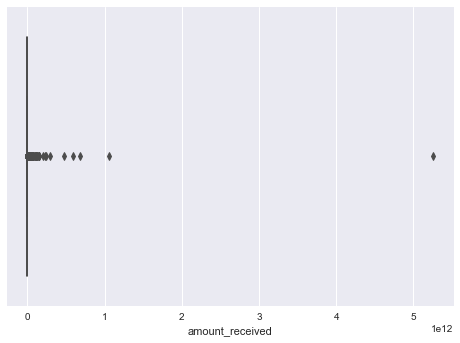

In [275]:
sns.boxplot(x= x_train['amount_received'])

In [276]:
q1 = x_train['amount_received'].quantile(0.25)
q3 = x_train['amount_received'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = (x_train['amount_received'] < lower_bound) | (x_train['amount_received'] > upper_bound)

In [277]:
num_outliers = outliers.sum()
percentage_outliers = (num_outliers / len(x_train)) * 100
print("Amount Received")
print(f"Number of outliers: {num_outliers}")
print(f"Percentage of outliers: {percentage_outliers}%")

Amount Received
Number of outliers: 55922
Percentage of outliers: 15.496310336323305%


<AxesSubplot:xlabel='amount_paid'>

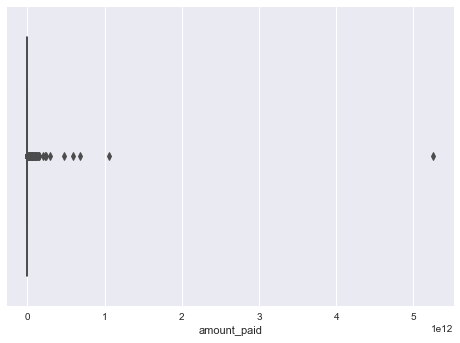

In [278]:
sns.boxplot(x=x_train['amount_paid'])

In [279]:
q1_paid = x_train['amount_paid'].quantile(0.25)
q3_paid = x_train['amount_paid'].quantile(0.75)
iqr_paid = q3_paid - q1_paid
lower_bound_paid = q1_paid - 1.5 * iqr_paid
upper_bound_paid = q3_paid + 1.5 * iqr_paid
outliers_paid = (x_train['amount_paid'] < lower_bound_paid) | (x_train['amount_paid'] > upper_bound_paid)

In [280]:
num_outliers_paid = outliers_paid.sum()
percentage_outliers_paid = (num_outliers_paid / len(x_train)) * 100
print("Amount Paid")
print(f"Number of outliers: {num_outliers_paid}")
print(f"Percentage of outliers: {percentage_outliers_paid}%")

Amount Paid
Number of outliers: 55756
Percentage of outliers: 15.450310774150463%


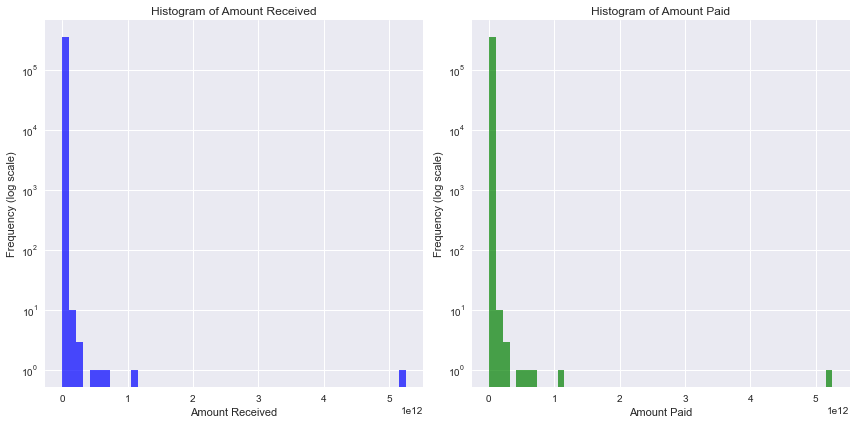

In [281]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(x_train['amount_received'], bins=50, color='blue', alpha=0.7, log=True)
plt.title('Histogram of Amount Received')
plt.xlabel('Amount Received')
plt.ylabel('Frequency (log scale)')

plt.subplot(1, 2, 2)
plt.hist(x_train['amount_paid'], bins=50, color='green', alpha=0.7, log=True)
plt.title('Histogram of Amount Paid')
plt.xlabel('Amount Paid')
plt.ylabel('Frequency (log scale)')

plt.tight_layout()
plt.show()

**From the histograms, we can observe the following:**

1. **Skewed Distribution:** Both amount_received and amount_paid are **right-skewed**, indicating that the **majority** of transactions involve **smaller amounts**, with a relatively small number of transactions involving very large amounts.
2. **Presence of Outliers:** The **long tails to the right** suggest the presence of **outliers.** These are transactions where the amounts are significantly higher than the typical transaction in the dataset.
3. **Comparability:** The two plots side by side allow for a direct comparison between the distributions of amount_received and amount_paid. They appear to follow a **similar distribution pattern**, suggesting a **potential correlation between these two variables.**

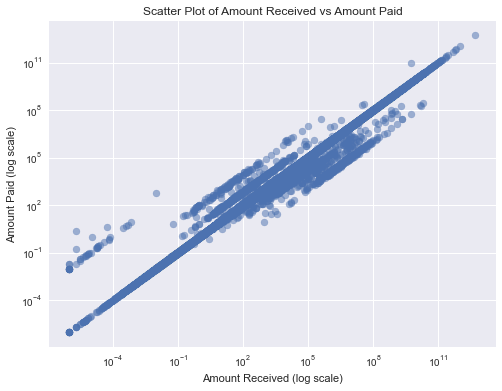

In [282]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train['amount_received'], x_train['amount_paid'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter Plot of Amount Received vs Amount Paid')
plt.xlabel('Amount Received (log scale)')
plt.ylabel('Amount Paid (log scale)')
plt.grid(True)
plt.show()

**From the histograms, we can observe the following:**
1. **Positive Linear Relationship:** There is a **clear positive correlation between the two variables.** As amount_received increases, amount_paid also increases, which is evident from the **upward trend** in the data points.
2. **Outliers:** There are a few points that **stray from the main cluster**, indicating possible outliers in the dataset.
3. **Implications for Analysis:** The **strong linear pattern** suggests that amount_received and amount_paid are closely related, which could be expected in financial transaction data. However, the presence of outliers may necessitate further investigation, especially if the goal is to detect fraudulent activity such as money laundering.

This scatter plot is a powerful diagnostic tool, as it not only confirms the relationship between the two variables but also highlights areas where the data does not conform to the expected pattern, which could be of particular interest in **fraud detection** or **risk management scenarios.**

### Categorical Data 

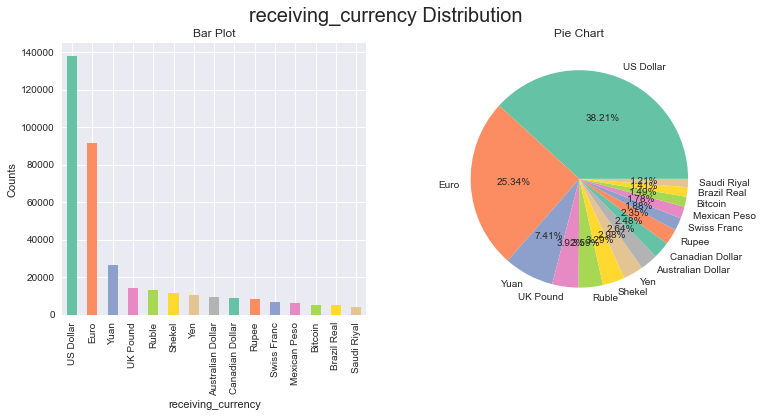

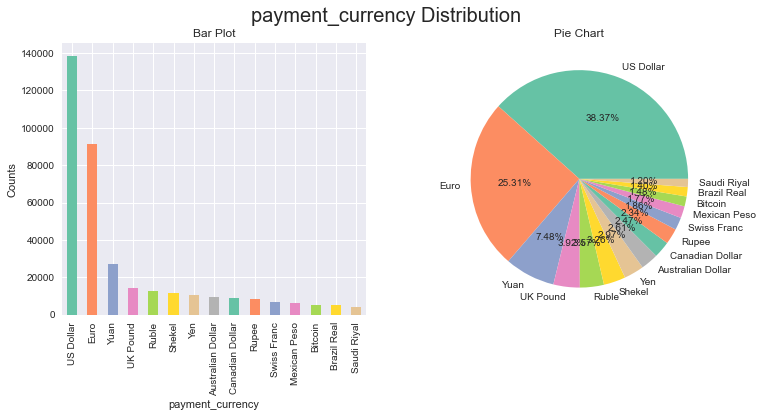

In [283]:
columns_to_plot = ['receiving_currency', 'payment_currency']
palette = sns.color_palette("Set2")

for column in columns_to_plot:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'{column} Distribution', fontsize=20)

    plt.subplot(1, 2, 1)
    x_train[column].value_counts().plot(kind='bar', color=palette)
    plt.title('Bar Plot')
    plt.xlabel(column)
    plt.ylabel('Counts')

    plt.subplot(1, 2, 2)
    x_train[column].value_counts().plot(kind='pie', autopct="%.2f%%", colors=palette)
    plt.title('Pie Chart')
    plt.ylabel('')

    plt.show()

**Dominant Currencies:** Both bar plots and pie charts illustrate that the **US Dollar** is the **most common** currency for both receiving and payment

**Concentration of Top Currencies:** The pie charts emphasize the concentration of transactions in the top few currencies, with the **US Dollar** and **Euro** together **accounting for over 60% of transactions**, which suggests a strong focus on these currencies in the transactional data.

These insights aslo can guide strategic business decisions, such as identifying key markets or **evaluating currency risk exposure.**

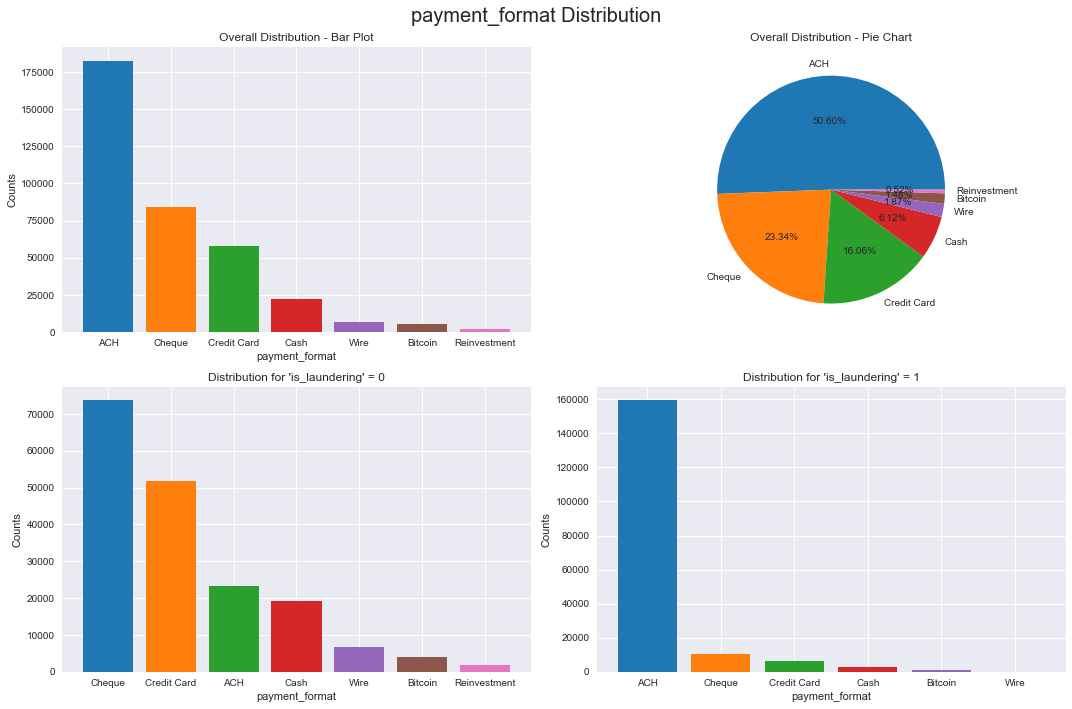

In [284]:
column = 'payment_format'
palette = sns.color_palette("tab10")

fig, axs = plt.subplots(2, 2, figsize=(15, 10)) 
fig.suptitle(f'{column} Distribution', fontsize=20)

axs[0, 0].bar(x_train[column].value_counts().index, x_train[column].value_counts().values, color=palette)
axs[0, 0].set_title('Overall Distribution - Bar Plot')
axs[0, 0].set_xlabel(column)
axs[0, 0].set_ylabel('Counts')

axs[0, 1].pie(x_train[column].value_counts(), labels=x_train[column].value_counts().index, autopct="%.2f%%", colors=palette)
axs[0, 1].set_title('Overall Distribution - Pie Chart')

x_train_laundering_0 = x_train[y_train == 0]
axs[1, 0].bar(x_train_laundering_0[column].value_counts().index, x_train_laundering_0[column].value_counts().values, color=palette)
axs[1, 0].set_title("Distribution for 'is_laundering' = 0")
axs[1, 0].set_xlabel(column)
axs[1, 0].set_ylabel('Counts')

x_train_laundering_1 = x_train[y_train == 1]
axs[1, 1].bar(x_train_laundering_1[column].value_counts().index, x_train_laundering_1[column].value_counts().values, color=palette)
axs[1, 1].set_title("Distribution for 'is_laundering' = 1")
axs[1, 1].set_xlabel(column)
axs[1, 1].set_ylabel('Counts')

plt.tight_layout()
plt.show()

**Overall Distribution:** **The ACH** (Automated Clearing House) format **dominates** the dataset, accounting for over half of the transactions, which is **common** in datasets that include **regular** and **automated transactions.** Other formats like cheques and credit cards also have significant representation, while formats like wire transfers and Bitcoin are less frequent.


**Non-Laundering Transactions:** The lower left visualization details the payment format distribution for transactions not flagged as laundering (is_laundering = 0). **Cheque** is the most common payment format, followed by **credit card** and **ACH**. This could indicate that regular, non-suspicious transactions predominantly use these methods.

**Laundering Transactions:** The lower right visualization illustrates the payment format distribution for transactions flagged as laundering (is_laundering = 1). **ACH** still appears as the most frequent, but the distribution seems more skewed towards this payment format compared to non-laundering transactions. This skew could suggest a preference or vulnerability in the ACH system that is exploited for laundering activities.

These visualizations provide valuable insights for risk assessment and the development of anti-money laundering (AML) strategies. The prevalence of ACH in both legitimate and suspicious transactions may warrant **further investigation** into the **security and monitoring** of **ACH payments**. Moreover, the relative frequencies of other payment formats in laundering cases might reveal patterns that could help in predicting and preventing fraudulent activities.

From a **strategic perspective**, the findings could **influence policy decisions**, such as implementing stricter monitoring protocols for ACH transactions 

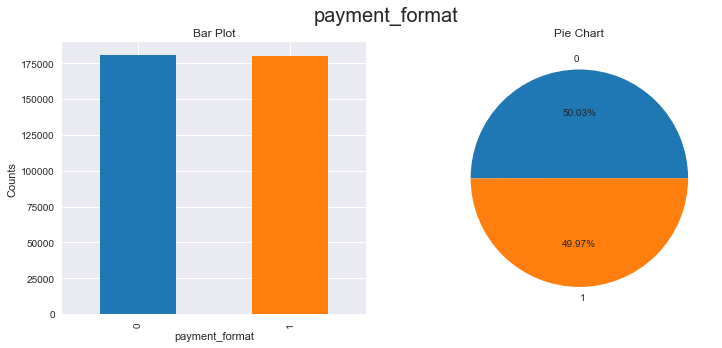

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle(f'{column}', fontsize=20) 
plt.style.use('seaborn')

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color=sns.color_palette("tab10"))
plt.title('Bar Plot')
plt.xlabel(column)
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
y_train.value_counts().plot(kind='pie', autopct="%.2f%%", colors=sns.color_palette("tab10"))
plt.title('Pie Chart')
plt.ylabel('')

plt.show()

The bar plot and pie chart show an almost equal count of transactions for the two classes of is_laundering: 0 (not laundering) and 1 (laundering). This indicates a **balanced dataset** with respect to the target variable, which is quite ideal for training classification models, as it **reduces** the **risk** of a **model** being **biased** towards the majority class.

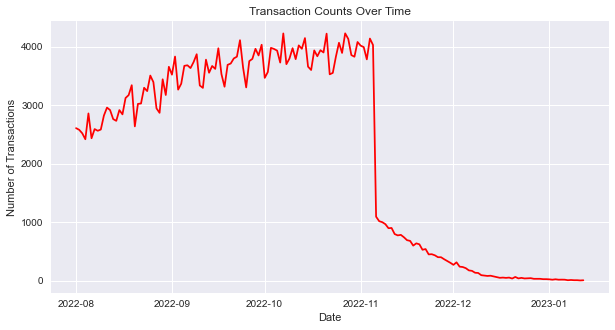

In [286]:
x_train['timestamp'] = pd.to_datetime(x_train['timestamp'], format='%Y/%m/%d %H:%M')

transactions_by_date = x_train['timestamp'].dt.date.value_counts().sort_index()

plt.figure(figsize=(10, 5))
transactions_by_date.plot(kind='line', color='red')
plt.title('Transaction Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

From the line chart depicted above, it's evident that the majority of transactions fall within the timeframe spanning from **September 2022** to **November 2022**. Additionally, noticeable outliers are observed from **November 2022** to **January 2023**, showcasing significantly lower counts of transactions during that period.

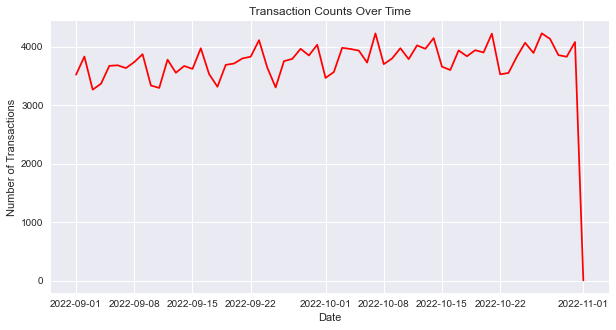

In [287]:
x_train['timestamp'] = pd.to_datetime(x_train['timestamp'], format='%Y/%m/%d %H:%M')

start_date = '2022-09-01'
end_date = '2022-11-01'
filtered_date = x_train[(x_train['timestamp'] >= start_date) & (x_train['timestamp'] <= end_date)]

transactions_by_date = filtered_date['timestamp'].dt.date.value_counts().sort_index()

plt.figure(figsize=(10, 5))
transactions_by_date.plot(kind='line', color='red')
plt.title('Transaction Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

After zooming into the specified timeframe of **September 2022** to **November 2022**, it becomes apparent that the peak counts of transactions occur at approximately weekly intervals, roughly around every 7 days.

## **How do we handle outliers?**

In our analytical approach, we have chosen **not to discard outliers** but rather incorporate them into the modeling process. Our decision stems from the understanding that **not all outlier data points should be eliminated**. At times, these outliers convey essential information that is crucial for **training robust machine learning models** capable of **handling similar anomalies** present in **real-world data**. 

Retaining outliers in the dataset aids in training models that can **adapt to unforeseen variations or anomalies**, promoting a more comprehensive understanding of the underlying patterns within the data. This strategy aligns with our objective to **build models** that **exhibit resilience and accuracy** when exposed to diverse and unconventional data scenarios, ultimately enhancing the model's generalizability and real-world applicability.

# **Feature Engineering**

## **Feature Extraction**

In [288]:
x_train.head(10)

,timestamp,from_bank,account,to_bank,account_1,amount_received,receiving_currency,amount_paid,payment_currency,payment_format
55116,2022-08-13 15:51:00,112140,80D805990,227535,810EB00A0,761.09,US Dollar,761.09,US Dollar,Cheque
10084,2022-08-03 07:13:00,210789,808B20D10,140416,84EED9000,108.28,Euro,108.28,Euro,Credit Card
209295,2022-09-17 00:37:00,70,1004286A8,134945,837FB3960,51.46,Euro,51.46,Euro,Cheque
301866,2022-10-27 06:44:00,143079,8166DC0F0,58692,8157F4490,1391468.76,Yen,1391468.76,Yen,ACH
366094,2022-10-19 15:51:00,70,1004289C0,1187494,846DFFCE0,1968421.18,Shekel,1968421.18,Shekel,Cheque
374535,2022-10-21 09:39:00,261901,83CDFFD00,11853,84575AAF0,57.99,Euro,57.99,Euro,Cheque
173246,2022-09-18 12:07:00,118303,806E1B810,230636,80F5B1A20,15460.23,US Dollar,15460.23,US Dollar,ACH
404030,2022-10-27 15:32:00,231260,810B8E330,22112,81F4C1190,4665.41,Euro,4665.41,Euro,Cheque
54532,2022-08-13 11:16:00,250403,813022090,250403,8130C8C00,483216.42,Yen,483216.42,Yen,ACH
306772,2022-10-07 12:59:00,219767,8285459E0,31691,8307C3A60,152.07,Euro,152.07,Euro,Cheque


In [289]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360873 entries, 55116 to 121958
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   timestamp           360873 non-null  datetime64[ns]
 1   from_bank           360873 non-null  int64         
 2   account             360873 non-null  object        
 3   to_bank             360873 non-null  int64         
 4   account_1           360873 non-null  object        
 5   amount_received     360873 non-null  float64       
 6   receiving_currency  360873 non-null  object        
 7   amount_paid         360873 non-null  float64       
 8   payment_currency    360873 non-null  object        
 9   payment_format      360873 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 30.3+ MB


In this feature extraction process, we **decompose** the **timestamp** into distinct components including **year, month, day, hour, and minute**. This breakdown allows us to treat each component as an individual numeric variable. The rationale behind this approach is to **facilitate analysis** and **potentially uncover new insights** from the dataset. By isolating these temporal elements, we aim to gain a more granular understanding of the data, enabling enhanced analytical capabilities and the potential discovery of valuable patterns or relationships within the information.

In [290]:
x_train['timestamp'] = pd.to_datetime(x_train['timestamp'])
x_test['timestamp'] = pd.to_datetime(x_test['timestamp'])

In [291]:
x_train['year'] = x_train['timestamp'].dt.year
x_test['year'] = x_test['timestamp'].dt.year

min_year = x_train['year'].min()
max_year = x_train['year'].max()
print(min_year, max_year)

2022 2023


In [292]:
x_train['year'].value_counts()

2022    360746
2023       127
Name: year, dtype: int64

In [293]:
x_train[x_train['year'] == 2023].head()

,timestamp,from_bank,account,to_bank,account_1,amount_received,receiving_currency,amount_paid,payment_currency,payment_format,year
436497,2023-01-06 14:29:00,1818,801C96840,12893,8011A4560,10438.45,Euro,10438.45,Euro,ACH,2023
415411,2023-01-03 14:52:00,115079,808746AB0,6521,80270D690,7266.22,Euro,7266.22,Euro,ACH,2023
442413,2023-01-05 11:25:00,235055,81C8A7C90,237304,80E474200,50560.66,Yuan,50560.66,Yuan,ACH,2023
415184,2023-01-01 10:19:00,94379,824911650,196972,824B511E0,8660.54,UK Pound,8660.54,UK Pound,ACH,2023
431207,2023-01-08 20:02:00,11,8013AD3A0,19326,81841EDB0,4538.35,US Dollar,4538.35,US Dollar,ACH,2023


There is an **anomaly** in this dataset. We have identified timestamps occurring in the year **2023**, despite the provided dataset statistics indicating that the time range is limited to the year **2022**.

Due to the limited volume of data for the year **2023**, we have decided to **DROP** this data from the dataset.

In [294]:
indices_to_drop_train = x_train[x_train['year'] == 2023].index
indices_to_drop_test = x_test[x_test['year'] == 2023].index

x_train = x_train[x_train['year'] != 2023]
x_test = x_test[x_test['year'] != 2023]

y_train = y_train.drop(indices_to_drop_train, axis=0)
y_test = y_test.drop(indices_to_drop_test, axis=0)

x_train['year'].value_counts()

2022    360746
Name: year, dtype: int64

In [295]:
print("x_train:", len(x_train))
print("y_train:", len(y_train))
print("x_test:", len(x_test))
print("y_test:", len(y_test))

x_train: 360746
y_train: 360746
x_test: 90192
y_test: 90192


In [296]:
x_train['month'] = x_train['timestamp'].dt.month
x_test['month'] = x_test['timestamp'].dt.month

min_month = x_train['month'].min()
max_month = x_train['month'].max()
print(min_month, max_month)

8 12


In [297]:
x_train['month'].value_counts()

10    120372
9     110156
8      90956
11     36327
12      2935
Name: month, dtype: int64

In [298]:
x_train[x_train['month'] == 12].head()

,timestamp,from_bank,account,to_bank,account_1,amount_received,receiving_currency,amount_paid,payment_currency,payment_format,year,month
449714,2022-12-08 22:16:00,12068,81ADF3CB0,161795,8173C0E30,1.102900e+05,Rupee,1.102900e+05,Rupee,ACH,2022,12
437210,2022-12-03 16:33:00,76077,81BF2B6A0,37293,80E179220,2.449596e+08,US Dollar,2.449596e+08,US Dollar,ACH,2022,12
439399,2022-12-04 11:02:00,239559,812B611E0,243187,813F38340,6.933840e+03,US Dollar,6.933840e+03,US Dollar,ACH,2022,12
398781,2022-12-04 17:20:00,3503,8029F5B20,2776,800834870,6.167860e+03,US Dollar,6.167860e+03,US Dollar,ACH,2022,12
446564,2022-12-08 17:03:00,224028,80FA70520,289579,82889E740,1.043531e+04,Euro,1.043531e+04,Euro,ACH,2022,12


There is also an **anomaly** in this dataset as well. We have identified timestamps occurring in the month of **December**, despite the provided dataset statistics indicating that the range of months spans from **August to November**.

Considering the limited volume of data for the month of **December**, we have opted to **DROP** this data from the dataset.

In [299]:
indices_to_drop_train = x_train[x_train['month'] == 12].index
indices_to_drop_test = x_test[x_test['month'] == 12].index

x_train = x_train[x_train['month'] != 12]
x_test = x_test[x_test['month'] != 12]

y_train = y_train.drop(indices_to_drop_train, axis = 0)
y_test = y_test.drop(indices_to_drop_test, axis = 0)

x_train['month'].value_counts()

10    120372
9     110156
8      90956
11     36327
Name: month, dtype: int64

In [300]:
print("x_train:", len(x_train))
print("y_train:", len(y_train))
print("x_test:", len(x_test))
print("y_test:", len(y_test))

x_train: 357811
y_train: 357811
x_test: 89419
y_test: 89419


In [301]:
x_train['day'] = x_train['timestamp'].dt.day
x_test['day'] = x_test['timestamp'].dt.day

min_day = x_train['day'].min()
max_day = x_train['day'].max()
print(min_day, max_day)

1 31


In [302]:
x_train['day_of_week'] = x_train['timestamp'].dt.dayofweek 
x_test['day_of_week'] = x_test['timestamp'].dt.dayofweek 

min_day_of_week = x_train['day_of_week'].min()
max_day_of_week = x_train['day_of_week'].max()
print(min_day_of_week, max_day_of_week)

0 6


We will conduct an examination to check for any data **beyond the date of November 5th, 2022**, to ensure compliance with the provided dataset statistics.

In [303]:
x_train[(x_train['month'] == 11) & (x_train['day'] > 5)].shape[0]

16360

A total of **16,360** records have been found within the timeframe **after November 5th, 2022**. Considering the substantial volume of this data, we have decided to **retain** these records and **refrain from dropping** them. This decision is based on the possibility that these records might contain valuable information pertinent to the subsequent modeling processes.

In [304]:
x_train['hour'] = x_train['timestamp'].dt.hour
x_test['hour'] = x_test['timestamp'].dt.hour

min_hour = x_train['hour'].min()
max_hour = x_train['hour'].max()
print(min_hour, max_hour)

0 23


In [305]:
x_train['minute'] = x_train['timestamp'].dt.minute
x_test['minute'] = x_test['timestamp'].dt.minute

min_minute = x_train['minute'].min()
max_minute = x_train['minute'].max()
print(min_minute, max_minute)

0 59


In [306]:
x_train = x_train.drop(columns = ['year'])
x_test = x_test.drop(columns = ['year'])

x_train = x_train.drop(columns = ['timestamp'])
x_test = x_test.drop(columns = ['timestamp'])

Subsequently, we have opted to **drop** the **[timestamp]** column as it is no longer utilized in the analysis. Additionally, the decision was made to **drop** the **[year]** column due to uniformity in its values, all of which are **consistent and equal to 2022**, rendering it redundant for any analytical purposes.

In [307]:
x_train.head(10)

,from_bank,account,to_bank,account_1,amount_received,receiving_currency,amount_paid,payment_currency,payment_format,month,day,day_of_week,hour,minute
55116,112140,80D805990,227535,810EB00A0,761.09,US Dollar,761.09,US Dollar,Cheque,8,13,5,15,51
10084,210789,808B20D10,140416,84EED9000,108.28,Euro,108.28,Euro,Credit Card,8,3,2,7,13
209295,70,1004286A8,134945,837FB3960,51.46,Euro,51.46,Euro,Cheque,9,17,5,0,37
301866,143079,8166DC0F0,58692,8157F4490,1391468.76,Yen,1391468.76,Yen,ACH,10,27,3,6,44
366094,70,1004289C0,1187494,846DFFCE0,1968421.18,Shekel,1968421.18,Shekel,Cheque,10,19,2,15,51
374535,261901,83CDFFD00,11853,84575AAF0,57.99,Euro,57.99,Euro,Cheque,10,21,4,9,39
173246,118303,806E1B810,230636,80F5B1A20,15460.23,US Dollar,15460.23,US Dollar,ACH,9,18,6,12,7
404030,231260,810B8E330,22112,81F4C1190,4665.41,Euro,4665.41,Euro,Cheque,10,27,3,15,32
54532,250403,813022090,250403,8130C8C00,483216.42,Yen,483216.42,Yen,ACH,8,13,5,11,16
306772,219767,8285459E0,31691,8307C3A60,152.07,Euro,152.07,Euro,Cheque,10,7,4,12,59


## **Feature Encoding**

### **One-Hot Encoding**

Based on the conducted **Exploratory Data Analysis (EDA)**, we identified **four main currencies** present in the training dataset: **US Dollar, Euro, Yuan, and UK Pound**. For the **remaining currencies**, we have decided to categorize them as **'Others'** to prevent excessive dimensionality in the dataset when applying one-hot encoding. This categorization aims to manage the dataset's size effectively, grouping less prevalent currencies under a single category to streamline the encoding process without compromising essential information during subsequent analyses.

In [308]:
main_currencies = ['US Dollar', 'Euro', 'Yuan', 'UK Pound']
others_category = 'Others'

x_train['receiving_currency'] = x_train['receiving_currency'].apply(lambda x: x if x in main_currencies else others_category)
x_train['payment_currency'] = x_train['payment_currency'].apply(lambda x: x if x in main_currencies else others_category)

x_test['receiving_currency'] = x_test['receiving_currency'].apply(lambda x: x if x in main_currencies else others_category)
x_test['payment_currency'] = x_test['payment_currency'].apply(lambda x: x if x in main_currencies else others_category)

x_train = pd.get_dummies(x_train, columns=['receiving_currency', 'payment_currency'])

x_test = pd.get_dummies(x_test, columns=['receiving_currency', 'payment_currency'])
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

In [309]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89419 entries, 140606 to 152926
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   from_bank                     89419 non-null  int64  
 1   account                       89419 non-null  object 
 2   to_bank                       89419 non-null  int64  
 3   account_1                     89419 non-null  object 
 4   amount_received               89419 non-null  float64
 5   amount_paid                   89419 non-null  float64
 6   payment_format                89419 non-null  object 
 7   month                         89419 non-null  int64  
 8   day                           89419 non-null  int64  
 9   day_of_week                   89419 non-null  int64  
 10  hour                          89419 non-null  int64  
 11  minute                        89419 non-null  int64  
 12  receiving_currency_Euro       89419 non-null  uint8  


In [310]:
x_train.head(3)

,from_bank,account,to_bank,account_1,amount_received,amount_paid,payment_format,month,day,day_of_week,...,receiving_currency_Euro,receiving_currency_Others,receiving_currency_UK Pound,receiving_currency_US Dollar,receiving_currency_Yuan,payment_currency_Euro,payment_currency_Others,payment_currency_UK Pound,payment_currency_US Dollar,payment_currency_Yuan
55116,112140,80D805990,227535,810EB00A0,761.09,761.09,Cheque,8,13,5,...,0,0,0,1,0,0,0,0,1,0
10084,210789,808B20D10,140416,84EED9000,108.28,108.28,Credit Card,8,3,2,...,1,0,0,0,0,1,0,0,0,0
209295,70,1004286A8,134945,837FB3960,51.46,51.46,Cheque,9,17,5,...,1,0,0,0,0,1,0,0,0,0


In [311]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357811 entries, 55116 to 121958
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   from_bank                     357811 non-null  int64  
 1   account                       357811 non-null  object 
 2   to_bank                       357811 non-null  int64  
 3   account_1                     357811 non-null  object 
 4   amount_received               357811 non-null  float64
 5   amount_paid                   357811 non-null  float64
 6   payment_format                357811 non-null  object 
 7   month                         357811 non-null  int64  
 8   day                           357811 non-null  int64  
 9   day_of_week                   357811 non-null  int64  
 10  hour                          357811 non-null  int64  
 11  minute                        357811 non-null  int64  
 12  receiving_currency_Euro       357811 non

Similar treatment is applied to the **[payment_format]** column for similar reasons as with the currencies mentioned earlier. In this case, we have identified **four main payment formats**: **ACH, Cheque, Credit Card, and Cash**. **Other payment formats** are grouped into the **'Others'** category. This strategy aims to manage the dimensionality of the dataset efficiently by consolidating less prevalent payment formats into a single category, facilitating the subsequent encoding process while preserving the essential information required for analysis.

In [312]:
main_payment_formats = ['ACH', 'Cheque', 'Credit Card', 'Cash']
others_payment_format = 'Others'

x_train['payment_format'] = x_train['payment_format'].apply(lambda x: x if x in main_payment_formats else others_payment_format)
x_test['payment_format'] = x_test['payment_format'].apply(lambda x: x if x in main_payment_formats else others_payment_format)

x_train = pd.get_dummies(x_train, columns=['payment_format'])

x_test = pd.get_dummies(x_test, columns=['payment_format'])
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

In [313]:
x_train.head()

,from_bank,account,to_bank,account_1,amount_received,amount_paid,month,day,day_of_week,hour,...,payment_currency_Euro,payment_currency_Others,payment_currency_UK Pound,payment_currency_US Dollar,payment_currency_Yuan,payment_format_ACH,payment_format_Cash,payment_format_Cheque,payment_format_Credit Card,payment_format_Others
55116,112140,80D805990,227535,810EB00A0,761.09,761.09,8,13,5,15,...,0,0,0,1,0,0,0,1,0,0
10084,210789,808B20D10,140416,84EED9000,108.28,108.28,8,3,2,7,...,1,0,0,0,0,0,0,0,1,0
209295,70,1004286A8,134945,837FB3960,51.46,51.46,9,17,5,0,...,1,0,0,0,0,0,0,1,0,0
301866,143079,8166DC0F0,58692,8157F4490,1391468.76,1391468.76,10,27,3,6,...,0,1,0,0,0,1,0,0,0,0
366094,70,1004289C0,1187494,846DFFCE0,1968421.18,1968421.18,10,19,2,15,...,0,1,0,0,0,0,0,1,0,0


In [314]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357811 entries, 55116 to 121958
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   from_bank                     357811 non-null  int64  
 1   account                       357811 non-null  object 
 2   to_bank                       357811 non-null  int64  
 3   account_1                     357811 non-null  object 
 4   amount_received               357811 non-null  float64
 5   amount_paid                   357811 non-null  float64
 6   month                         357811 non-null  int64  
 7   day                           357811 non-null  int64  
 8   day_of_week                   357811 non-null  int64  
 9   hour                          357811 non-null  int64  
 10  minute                        357811 non-null  int64  
 11  receiving_currency_Euro       357811 non-null  uint8  
 12  receiving_currency_Others     357811 non

### **Frequency Encoding**

In [315]:
x_train['from_bank'].value_counts()

70         37403
20          2337
0           2329
11          2216
12          2099
           ...  
3220877        1
2112987        1
327246         1
3154512        1
3101719        1
Name: from_bank, Length: 9302, dtype: int64

In [316]:
x_train['to_bank'].value_counts()

20         1848
0          1760
11         1718
12         1617
27         1300
           ... 
1202433       1
173729        1
1166602       1
3141860       1
219625        1
Name: to_bank, Length: 6718, dtype: int64

In [317]:
x_train['account'].value_counts()

100428660    13529
1004286A8     8649
1004286F0     2582
1004289C0     1702
100428858     1320
             ...  
82D18CFA0        1
83CFFE660        1
8107EDCC0        1
80DB58110        1
814F5B430        1
Name: account, Length: 221426, dtype: int64

In [318]:
x_train['account_1'].value_counts()

81BBEA160    237
81C393430    202
800ED43D0    150
804682F80    131
824BF4150    129
            ... 
800471DF0      1
84790E190      1
810E674A0      1
803D51250      1
81717FB40      1
Name: account_1, Length: 266613, dtype: int64

We discovered that there's an **extensive range of classes** within the aforementioned four variables: **[from_bank], [to_bank], [account], and [account_1]**, making it **impractical** to perform one-hot encoding due to the resultant significant increase in **dataset dimensions**, leading to the curse of dimensionality that could detrimentally impact machine learning performance. Therefore, we have opted to employ **frequency encoding** for those variables. **Frequency encoding** is deemed crucial as the frequency of bank and account usage bears **informative significance**, potentially **influencing money laundering activities**. This encoding technique allows us to represent these variables by their respective frequencies of occurrence, preserving the essential information while mitigating the issues arising from high-dimensional data.

In [319]:
columns_to_encode = ['from_bank', 'to_bank', 'account', 'account_1']

for col in columns_to_encode:
    encoding_train = x_train[col].value_counts(normalize=True)
    x_train[col] = x_train[col].map(encoding_train)
    
    encoding_test = x_test[col].value_counts(normalize=True)
    x_test[col] = x_test[col].map(encoding_test)

In [320]:
x_train.head()

,from_bank,account,to_bank,account_1,amount_received,amount_paid,month,day,day_of_week,hour,...,payment_currency_Euro,payment_currency_Others,payment_currency_UK Pound,payment_currency_US Dollar,payment_currency_Yuan,payment_format_ACH,payment_format_Cash,payment_format_Cheque,payment_format_Credit Card,payment_format_Others
55116,0.000397,0.000008,0.000310,0.000003,761.09,761.09,8,13,5,15,...,0,0,0,1,0,0,0,1,0,0
10084,0.000606,0.000011,0.000034,0.000008,108.28,108.28,8,3,2,7,...,1,0,0,0,0,0,0,0,1,0
209295,0.104533,0.024172,0.000048,0.000003,51.46,51.46,9,17,5,0,...,1,0,0,0,0,0,0,1,0,0
301866,0.000151,0.000003,0.000067,0.000003,1391468.76,1391468.76,10,27,3,6,...,0,1,0,0,0,1,0,0,0,0
366094,0.104533,0.004757,0.000089,0.000003,1968421.18,1968421.18,10,19,2,15,...,0,1,0,0,0,0,0,1,0,0


In [321]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357811 entries, 55116 to 121958
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   from_bank                     357811 non-null  float64
 1   account                       357811 non-null  float64
 2   to_bank                       357811 non-null  float64
 3   account_1                     357811 non-null  float64
 4   amount_received               357811 non-null  float64
 5   amount_paid                   357811 non-null  float64
 6   month                         357811 non-null  int64  
 7   day                           357811 non-null  int64  
 8   day_of_week                   357811 non-null  int64  
 9   hour                          357811 non-null  int64  
 10  minute                        357811 non-null  int64  
 11  receiving_currency_Euro       357811 non-null  uint8  
 12  receiving_currency_Others     357811 non

### **Robust Scaling**

Based on the Exploratory Data Analysis (EDA) conducted on the two numerical columns, namely **[amount_received]** and **[amount_paid]**, it is identified that approximately **15%** of the data points are **outliers**. Consequently, we have decided to employ **robust scaling** due to its **resilience against outlier** influence.

Robust scaling methodology, unlike other scaling techniques, such as normalization or standardization, is **more adept** at **handling datasets with a notable percentage of outliers**. By utilizing robust scaling, we aim to normalize these numerical features while minimizing the influence of these outliers, thus ensuring a more stable and reliable scaling transformation for subsequent analysis or modeling tasks. This approach is fundamental in preserving the integrity of the data distribution while mitigating the undue impact of extreme values during the scaling process.

In [322]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
columns_to_scale = ['amount_received', 'amount_paid']

x_train[columns_to_scale] = robust_scaler.fit_transform(x_train[columns_to_scale])
x_test[columns_to_scale] = robust_scaler.transform(x_test[columns_to_scale])

In [323]:
x_train.head()

,from_bank,account,to_bank,account_1,amount_received,amount_paid,month,day,day_of_week,hour,...,payment_currency_Euro,payment_currency_Others,payment_currency_UK Pound,payment_currency_US Dollar,payment_currency_Yuan,payment_format_ACH,payment_format_Cash,payment_format_Cheque,payment_format_Credit Card,payment_format_Others
55116,0.000397,0.000008,0.000310,0.000003,-0.225298,-0.225617,8,13,5,15,...,0,0,0,1,0,0,0,1,0,0
10084,0.000606,0.000011,0.000034,0.000008,-0.270194,-0.270606,8,3,2,7,...,1,0,0,0,0,0,0,0,1,0
209295,0.104533,0.024172,0.000048,0.000003,-0.274102,-0.274522,9,17,5,0,...,1,0,0,0,0,0,0,1,0,0
301866,0.000151,0.000003,0.000067,0.000003,95.418367,95.618167,10,27,3,6,...,0,1,0,0,0,1,0,0,0,0
366094,0.104533,0.004757,0.000089,0.000003,135.097334,135.380155,10,19,2,15,...,0,1,0,0,0,0,0,1,0,0


In [324]:
x_test.head()

,from_bank,account,to_bank,account_1,amount_received,amount_paid,month,day,day_of_week,hour,...,payment_currency_Euro,payment_currency_Others,payment_currency_UK Pound,payment_currency_US Dollar,payment_currency_Yuan,payment_format_ACH,payment_format_Cash,payment_format_Cheque,payment_format_Credit Card,payment_format_Others
140606,0.000045,0.000011,0.000257,0.000011,-0.210635,-0.210923,9,2,4,3,...,0,0,0,1,0,1,0,0,0,0
306261,0.000145,0.000022,0.000481,0.000011,0.586587,0.587967,10,17,0,5,...,0,0,0,1,0,1,0,0,0,0
21592,0.105503,0.023876,0.000022,0.000011,0.037791,0.038023,8,5,4,21,...,1,0,0,0,0,0,0,1,0,0
177136,0.005390,0.000011,0.000526,0.000011,-0.051258,-0.051212,9,20,1,16,...,0,0,0,1,0,1,0,0,0,0
385228,0.000112,0.000011,0.000034,0.000011,1.865952,1.870009,10,23,6,19,...,0,0,0,1,0,0,1,0,0,0


In [325]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357811 entries, 55116 to 121958
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   from_bank                     357811 non-null  float64
 1   account                       357811 non-null  float64
 2   to_bank                       357811 non-null  float64
 3   account_1                     357811 non-null  float64
 4   amount_received               357811 non-null  float64
 5   amount_paid                   357811 non-null  float64
 6   month                         357811 non-null  int64  
 7   day                           357811 non-null  int64  
 8   day_of_week                   357811 non-null  int64  
 9   hour                          357811 non-null  int64  
 10  minute                        357811 non-null  int64  
 11  receiving_currency_Euro       357811 non-null  uint8  
 12  receiving_currency_Others     357811 non

In [326]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89419 entries, 140606 to 152926
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   from_bank                     89419 non-null  float64
 1   account                       89419 non-null  float64
 2   to_bank                       89419 non-null  float64
 3   account_1                     89419 non-null  float64
 4   amount_received               89419 non-null  float64
 5   amount_paid                   89419 non-null  float64
 6   month                         89419 non-null  int64  
 7   day                           89419 non-null  int64  
 8   day_of_week                   89419 non-null  int64  
 9   hour                          89419 non-null  int64  
 10  minute                        89419 non-null  int64  
 11  receiving_currency_Euro       89419 non-null  uint8  
 12  receiving_currency_Others     89419 non-null  uint8  


# **Modeling 1 : Logistic Regression Classifier**

The **Logistic Regression Classifier** was chosen as the **initial model** for predicting the "is_laundering" label of 1 or 0 based on our exploratory data analysis (EDA). Through the EDA process, we observed a **positive linear relationship** between certain features. This classifier was selected due to its capability in handling linear relationships and its **relatively faster runtime** compared to more complex models, which is beneficial for expediting the initial analysis process.

**Logistic Regression** is an appropriate choice as it's a simple yet effective algorithm for binary classification tasks like identifying potential money laundering transactions. It models the probability of a **binary outcome** using a logistic function, making it suitable for our goal of predicting whether a transaction involves money laundering or not. Despite its simplicity, Logistic Regression **can capture linear relationships** between features and the target variable, providing insights into the influence of different factors on the likelihood of money laundering. As our starting point in the analysis, it serves as a foundational model to establish a baseline performance and pave the way for more advanced algorithms.

In [1402]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In the context of a dataset with 357,811 rows and 26 columns, selecting **max_iter=1000** in the Logistic Regression model determines the maximum iterations for the solver to converge. **Larger datasets** or those with higher complexity may **require more iterations** for convergence. Setting a **higher max_iter** allows the solver more iterations to **find the optimal solution**.

### **Feature Importance**

In [1403]:
feature_importance = logistic_model.coef_[0]
print(feature_importance)

[ 1.86243390e-02  3.67030047e-03  1.12595834e-03  8.27507160e-05
  1.30695975e-06 -5.83349782e-08 -6.01732289e-02 -3.05202901e-03
 -3.59010251e-02 -2.83858583e-04 -1.19173678e-03  1.38494811e-01
 -3.73057467e-01  4.09796405e-02  5.54092442e-02  1.17340894e-02
  1.42218795e-01 -3.52743619e-01  4.11214130e-02  3.87704941e-02
  4.19323372e-03  2.78008722e+00 -3.66740009e-01 -1.30442596e+00
 -9.78518657e-01 -2.56842280e-01]


**Positive Coefficients:** Features with positive coefficients contribute positively to the prediction of the target variable ('is_laundering'). A larger positive coefficient suggests a stronger positive impact of that particular feature on the likelihood of a transaction being classified as money laundering.

**Negative Coefficients:** Conversely, features with negative coefficients contribute inversely to the prediction. A larger negative coefficient indicates a stronger negative impact of that feature on the likelihood of money laundering.

## **Model Evaluation 1: Logistic Regression Classifier**

### **Evaluation Metrics**

In [1404]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_pred = logistic_model.predict(x_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

In [1405]:
print(conf_matrix)

[[39234  5782]
 [ 5312 39091]]


- **True Positives (TP):** The number of correctly predicted positive instances (correctly predicted money laundering transactions in this context). In the provided confusion matrix, there are **39,234** true positives.
- **True Negatives (TN):** The number of correctly predicted negative instances (correctly predicted non-money laundering transactions). Here, there are **39,091** true negatives.
- **False Positives (FP):** The number of non-money laundering transactions incorrectly predicted as money laundering transactions. In this matrix, there are **5,782** false positives.
- **False Negatives (FN):** The number of money laundering transactions incorrectly predicted as non-money laundering transactions. There are **5,312** false negatives.

The **high values of TP and TN** indicate that the model is **proficient in correctly classifying** both money laundering and non-money laundering transactions.
The number of **false positives (5,782) and false negatives (5,312)** suggests **some misclassifications** occurred, where the model predicted incorrectly for a portion of the instances.

In [1406]:
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     45016
           1       0.87      0.88      0.88     44403

    accuracy                           0.88     89419
   macro avg       0.88      0.88      0.88     89419
weighted avg       0.88      0.88      0.88     89419



#### For Class 0 (Non-money Laundering Transactions):
- **Precision (0):** Precision refers to the accuracy of positive predictions. For class 0, it's 88%. This means that out of all instances predicted as non-money laundering, 88% were correctly predicted.
- **Recall (0):** Recall, also known as sensitivity or true positive rate, represents the ratio of correctly predicted positive instances to all actual positives. The recall for class 0 is 87%, indicating that the model correctly identified 87% of the actual non-money laundering transactions.
- **F1-Score (0):** The F1-score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall. For class 0, the F1-score is 88%.
- **Support (0):** The number of instances for class 0 is 45,016.

#### For Class 1 (Money Laundering Transactions):
- **Precision (1):** The precision for class 1 is 87%, implying that 87% of the predicted money laundering transactions were correct.
- **Recall (1):** The recall for class 1 is 88%, indicating that 88% of the actual money laundering transactions were identified correctly by the model.
- **F1-Score (1):** The F1-score for class 1 is 88%.
- **Support (1):** The number of instances for class 1 is 44,403.

#### Overall Metrics:
- **Accuracy:** The overall accuracy of the model across both classes is **88%**, suggesting the **percentage of correctly classified instances** among the total predictions.
- **Macro Avg:** The macro average computes the unweighted mean of precision, recall, and F1-score across both classes.
- **Weighted Avg:** The weighted average calculates metrics for each class independently and then averages them by the support (the number of true instances for each class) to account for class imbalance.

In [1407]:
print(roc_auc)

0.8759626116926273


The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score is a performance metric that evaluates the model's ability to distinguish between classes. In this case, the obtained ROC AUC score is approximately **0.876.**

The ROC AUC score typically ranges between 0 and 1, where:
- A score closer to 1 suggests the model has excellent discrimination capability between the positive and negative classes.
- A score around 0.5 indicates the model's performance is close to random guessing.

A score of **0.876** is **relatively high**, indicating that the logistic regression model performs **reasonably well** in **distinguishing** between **money laundering and non-money laundering transactions**. This metric helps in evaluating the model's overall predictive performance across different threshold values for class separation.

# **Modeling 2: Random Forest Classifier**

**Moving to the Random Forest Classifier** from logistic regression aligns with our intention to **enhance** the model's performance. As we transitioned to **Ensemble Methods**, we considered the dataset's inherent challenges, particularly the significant **proportion of outlier**, approximately **15%** in this case. Managing such outliers can greatly impact the efficacy of machine learning models. Opting for Tree-Based Models like Random Forest is a strategic choice due to their inherent robustness to outliers. 

These models, including Decision Trees and their ensemble forms, are less influenced by extreme values as their node splitting relies on order statistics such as medians rather than raw data. Moreover, Random Forests excel in **capturing intricate non-linear relationships and feature interactions**, offering **resilience to the presence of outliers** and eliminating the need for feature scaling. Hence, this shift allows us to leverage the strengths of Random Forests in handling outliers while exploring more complex relationships within the data for improved model performance.

In [76]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini', max_depth=4)
RF_class.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

The utilization of the **'gini'** criterion for impurity measurement and constraining the **max_depth** parameter to **4** in the RandomForestClassifier serves two vital purposes. Firstly, 'gini' excels in **evaluating impurity**, making it a reliable choice that often **outperforms** other criteria like **'entropy'**. This criterion is **computationally efficient** and commonly preferred in diverse scenarios. Secondly, **limiting the max_depth** to a shallow level at **4** helps **prevent overfitting** while maintaining the model's simplicity. This choice fosters the creation of less complex trees, thereby reducing variance and improving the model's ability to generalize to new, unseen data. By constraining tree depth, it also safeguards against the model's potential to memorize irrelevant details or outliers present in the dataset, resulting in a **more resilient and robust performance overall**.

### **Feature Importance**

In [77]:
feature_importance = RF_class.feature_importances_
print(feature_importance)

[3.84935847e-02 5.22106320e-02 2.02411750e-02 5.75252030e-02
 7.40359644e-02 7.37413225e-02 2.33025232e-03 2.87441213e-04
 7.12262351e-04 5.73399343e-04 1.40850397e-05 2.13075703e-04
 6.36076808e-03 5.81859763e-06 2.25112254e-04 1.31539482e-05
 5.50459729e-05 1.52669184e-03 1.62523773e-06 2.44532081e-04
 7.51922715e-06 4.40483275e-01 1.60260800e-02 1.29098851e-01
 7.60051994e-02 9.56792967e-03]


The feature importance values displayed above indicate the relative significance of each feature in the RandomForestClassifier model. These values denote the contribution of individual features towards making predictions. **A higher value** suggests a **more influential role** in the **model's decision-making process**. In the provided list, each numerical value corresponds to a specific feature in the dataset. The larger the value, the more influential the feature is in determining the target variable. For instance, features with higher importance scores, such as **4th, 5th, and 6th**, have more impact on the model's predictions compared to features with lower values. The feature with the highest importance score (approximately 0.44) appears to be the most significant predictor among all the features.

## **Model Evaluation 2: Random Forest Classifier**

### **Evaluation Metrics**

In [78]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_predict = RF_class.predict(x_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Classification report
class_report = classification_report(y_test, y_predict)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_predict)

In [79]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[40438  4578]
 [ 5766 38637]]


- **True Positives (TP):** The number of correctly predicted positive instances (correctly predicted money laundering transactions in this context). In the provided confusion matrix, there are **40,438** true positives.
- **True Negatives (TN):** The number of correctly predicted negative instances (correctly predicted non-money laundering transactions). Here, there are **38,637** true negatives.
- **False Positives (FP):** The number of non-money laundering transactions incorrectly predicted as money laundering transactions. In this matrix, there are **4,578** false positives.
- **False Negatives (FN):** The number of money laundering transactions incorrectly predicted as non-money laundering transactions. There are **5,766** false negatives.

The **high values of TP and TN** indicate that the model is **proficient in correctly classifying** both money laundering and non-money laundering transactions.
The number of **false positives (4,578) and false negatives (5,766)** suggests **some misclassifications** occurred, where the model predicted incorrectly for a portion of the instances.

In [80]:
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     45016
           1       0.89      0.87      0.88     44403

    accuracy                           0.88     89419
   macro avg       0.88      0.88      0.88     89419
weighted avg       0.88      0.88      0.88     89419



#### For Class 0 (Non-money Laundering Transactions):
- **Precision (0):** 88% precision for non-money laundering transactions implies that 88% of the predicted non-money laundering transactions were accurate.
- **Recall (0):** The model correctly identified 90% of the actual non-money laundering transactions.
- **F1-Score (0):** The F1-score for class 0 (non-money laundering) transactions stands at 89%.
- **Support (0):** There are 45,016 instances for non-money laundering transactions.

#### For Class 1 (Money Laundering Transactions):
- **Precision (1):** 89% precision for money laundering transactions indicates that 89% of the predicted money laundering transactions were accurate.
- **Recall (1):** The model correctly identified 87% of the actual money laundering transactions.
- **F1-Score (1):** The F1-score for class 1 (money laundering) transactions is 88%.
- **Support (1):** There are 44,403 instances for money laundering transactions.

#### Overall Metrics:
- **Accuracy:** The overall accuracy of the model is **88%**. It represents the percentage of correctly classified instances among the total predictions.
- **Macro Avg:** The macro average calculates the unweighted mean of precision, recall, and F1-score across both classes. In this case, it's 88%.
- **Weighted Avg:** The weighted average computes metrics for each class independently and then averages them by the support (the number of true instances for each class). It's 88% in this evaluation.

In [81]:
print("\nROC AUC Score:", roc_auc)


ROC AUC Score: 0.8842233674286557


The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score for the **Random Forest Classifier** is notably higher at approximately **0.884**, surpassing the score achieved by the **Logistic Regression Classifier**, which was **0.876**.

This **improvement** in the **ROC AUC score** indicates that the **Random Forest Classifier exhibits better discrimination and predictive ability in distinguishing between money laundering and non-money laundering transactions** compared to the Logistic Regression Classifier. The higher ROC AUC score of the Random Forest model implies a superior overall performance in correctly identifying positive and negative instances across various thresholds, thus making it a more effective classifier for this specific classification task.

## **Hyperparameter Tuning**

Given the current accuracy level of **88%**, which **aligns** with the **Logistic Regression Classifier's** performance achieved earlier, we intend to conduct **tuning** on the Random Forest Classifier. The objective is to **enhance the model's accuracy** further. Despite achieving a commendable accuracy level, the aim is to explore potential adjustments in the Random Forest model's hyperparameters or other relevant settings to seek potential performance improvements. By fine-tuning the model, we **aim to surpass the current accuracy threshold and potentially achieve a higher level of predictive accuracy** in identifying money laundering and non-money laundering transactions.

In [157]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10]
}

In [158]:
RF_class2 = RandomForestClassifier()
RF_class2 = GridSearchCV(RF_class2,
                            param_grid = parameters,
                            scoring = 'accuracy',
                            cv = 5)

The parameter choices, 'criterion' and 'max_depth', in the GridSearchCV aim to optimize the Random Forest Classifier's performance. **'Criterion'** enables comparing the quality of splits using **'gini'** and **'entropy'** measures, while 'max_depth' governs the maximum depth of individual trees. The variation in **'max_depth'** from **5 to 10** allows evaluating models with different tree depths, aiming to strike a balance between capturing intricate patterns and preventing overfitting. 

Using **GridSearchCV** with these specific parameters allows us to perform an exhaustive search to find the best combination of these hyperparameters by evaluating models using cross-validation (**cv=5** in this case) and the scoring metric 'accuracy'

In [159]:
RF_class2.fit(x_train, y_train)
print("Tuned Hyperparameters :", RF_class2.best_params_)
print("Accuracy :", RF_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 10}
Accuracy : 0.9014144335225419


The Random Forest Classifier was fine-tuned using GridSearchCV, resulting in optimized hyperparameters. The selected parameters, **'criterion'** set to **'entropy'** and **'max_depth'** set as **10**, were found to be the best performing combination based on the specified criteria. This hyperparameter tuning achieved an improved accuracy of **90.14%**, signifying better predictive performance in distinguishing between money laundering and non-money laundering transactions compared to previous settings.

In [160]:
RF_class_best = RandomForestClassifier(criterion = 'entropy', max_depth = 10)
RF_class_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=10)

### **Feature Importance**

In [161]:
feature_importance_best = RF_class_best.feature_importances_
print("Feature Importance:", feature_importance_best)

Feature Importance: [4.27688123e-02 7.43242601e-02 1.35807372e-02 4.09021398e-02
 7.06644480e-02 6.81738361e-02 4.33920193e-03 1.65269523e-03
 3.13966935e-03 1.60205782e-03 7.77607284e-04 1.16681531e-03
 7.08469190e-03 1.23891034e-04 1.23431858e-03 7.54101039e-04
 1.14611159e-03 4.44350961e-03 1.57182192e-04 1.97717887e-03
 1.32671849e-03 4.47446349e-01 1.87392516e-02 1.15123757e-01
 7.06027100e-02 6.74794830e-03]


The feature importance values obtained from the RandomForestClassifier model indicate the relative significance of each feature in predictive outcomes. Higher values, such as approximately 0.447 for feature 21, 0.115 for feature 23, and 0.071 for feature 4, represent more influential roles in the model's decision-making process. These scores signify the extent of contribution each feature makes in predicting the target variable, with feature 21 notably standing out as the most influential predictor among all features. Conversely, features with lower importance scores, like features 13, 18, and 20, with values below 0.001, have comparatively lesser impact on the model's predictions.

### **Evaluation Metrics**

In [162]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_predict_best = RF_class_best.predict(x_test)

# Confusion Matrix
conf_matrix_best = confusion_matrix(y_test, y_predict_best)

# Classification Report
class_report_best = classification_report(y_test, y_predict_best)

# ROC AUC Score
roc_auc_best = roc_auc_score(y_test, y_predict_best)

In [163]:
print("Confusion Matrix:\n", conf_matrix_best)

Confusion Matrix:
 [[37987  7029]
 [ 2069 42334]]


- **True Positives (TP):** The number of correctly predicted positive instances (correctly predicted money laundering transactions in this context). In the provided confusion matrix, there are **37,987** true positives.
- **True Negatives (TN):** The number of correctly predicted negative instances (correctly predicted non-money laundering transactions). Here, there are **42,334** true negatives.
- **False Positives (FP):** The number of non-money laundering transactions incorrectly predicted as money laundering transactions. In this matrix, there are **7,029** false positives.
- **False Negatives (FN):** The number of money laundering transactions incorrectly predicted as non-money laundering transactions. There are **2,069** false negatives.

The **high values of TP and TN** indicate that the model is **proficient in correctly classifying** both money laundering and non-money laundering transactions.
The number of **false positives (7,029) and false negatives (2,069)** suggests **some misclassifications** occurred, where the model predicted incorrectly for a portion of the instances.

In [164]:
print("Classification Report:\n", class_report_best)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89     45016
           1       0.86      0.95      0.90     44403

    accuracy                           0.90     89419
   macro avg       0.90      0.90      0.90     89419
weighted avg       0.90      0.90      0.90     89419



#### For Class 0 (Non-money Laundering Transactions):
- **Precision (0):** Precision for non-money laundering transactions is 95%, indicating that 95% of instances predicted as non-money laundering were accurate.
- **Recall (0):** Recall for non-money laundering transactions is 84%, signifying that the model correctly identified 84% of the actual non-money laundering transactions.
- **F1-Score (0):** The F1-score for class 0 is 89%.
- **Support (0):** The number of instances classified as non-money laundering (Class 0) is 45,016.

#### For Class 1 (Money Laundering Transactions):
- **Precision (1):** Precision for money laundering transactions is 86%, implying that 86% of the predicted money laundering transactions were correct.
- **Recall (1):** Recall for money laundering transactions is 95%, indicating that 95% of the actual money laundering transactions were identified correctly by the model.
- **F1-Score (1):** The F1-score for class 1 is 90%.
- **Support (1):** The number of instances classified as money laundering (Class 1) is 44,403.

#### Overall Metrics:
- **Accuracy:** The overall accuracy of the model across both classes is 90%, suggesting that 90% of the total instances were correctly classified.
- **Macro Avg:** The macro average of precision, recall, and F1-score across both classes is 90%.
- **Weighted Avg:** The weighted average of precision, recall, and F1-score, considering class imbalance, is 90%.

In [165]:
print("ROC AUC Score:", roc_auc_best)

ROC AUC Score: 0.8986297836569904


The ROC AUC score achieved after tuning the Random Forest Classifier has shown further improvement, reaching **0.898** compared to the scores obtained previously: **0.884** before tuning and **0.876** in the Logistic Regression Classifier. This enhancement indicates that the model's capacity to discriminate between money laundering and non-money laundering transactions has been further refined, exhibiting an even better performance after tuning the hyperparameters of the Random Forest Classifier.

# **Modeling 3: XGBoost Classifier**

XGBoost serves as an optimal choice due to its **adaptability in managing a wide range of data types**, encompassing both **categorical and continuous features**. Financial datasets often exhibit this diverse mix of data types, making XGBoost's flexibility highly advantageous. Moreover, the financial domain frequently **contends with outliers** stemming from market fluctuations or data inconsistencies. **XGBoost's robustness to outliers** is notable, as it employs tree-based techniques that are less influenced by extreme values. 

Additionally, XGBoost's incorporation of **L1 (Lasso) and L2 (Ridge)** regularization methods plays a pivotal role in **curbing overfitting tendencies**. This attribute is particularly crucial in financial modeling, where the model's reliability on unforeseen data holds significant importance. Lastly, XGBoost is recognized for its **high performance and computational efficiency**, enabling it to efficiently **handle large-scale datasets** and operate effectively in both single-machine and distributed computing environments. These attributes make XGBoost a compelling choice for modeling financial data.

In [335]:
#pip install xgboost
import xgboost as xgb

xgboost = xgb.XGBClassifier()
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## **Model Evaluation 3: XGBoost Classifier**

### **Evaluation Metrics**

In [337]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
y_pred = xgboost.predict(x_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

#ROC AUC score
roc_auc = roc_auc_score(y_test, y_predict)

In [338]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[38900  6116]
 [ 2955 41448]]


- **True Positives (TP):** The number of correctly predicted positive instances (correctly predicted money laundering transactions in this context). In the provided confusion matrix, there are **38,900** true positives.
- **True Negatives (TN):** The number of correctly predicted negative instances (correctly predicted non-money laundering transactions). Here, there are **41,448** true negatives.
- **False Positives (FP):** The number of non-money laundering transactions incorrectly predicted as money laundering transactions. In this matrix, there are **6,116** false positives.
- **False Negatives (FN):** The number of money laundering transactions incorrectly predicted as non-money laundering transactions. There are **2,955** false negatives.

The **high values of TP and TN** indicate that the model is **proficient in correctly classifying** both money laundering and non-money laundering transactions.
The number of **false positives (6,116) and false negatives (2,955)** suggests **some misclassifications** occurred, where the model predicted incorrectly for a portion of the instances.

In [339]:
print("Classification report:\n", class_report)

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.90     45016
           1       0.87      0.93      0.90     44403

    accuracy                           0.90     89419
   macro avg       0.90      0.90      0.90     89419
weighted avg       0.90      0.90      0.90     89419



#### For Class 0 (Non-money Laundering Transactions):
- **Precision (0):** Precision for non-money laundering transactions stands at 93%, indicating that 93% of the instances classified as non-money laundering were accurate.
- **Recall (0):** Recall for non-money laundering transactions is 86%, signifying that the model correctly identified 86% of the actual non-money laundering transactions.
- **F1-Score (0):** The F1-score for class 0 is 90%.
- **Support (0):** The number of instances classified as non-money laundering (Class 0) is 45,016.

#### For Class 1 (Money Laundering Transactions):
- **Precision (1):** Precision for money laundering transactions is 87%, indicating that 87% of the predicted money laundering transactions were correct.
- **Recall (1):** Recall for money laundering transactions is 93%, suggesting that 93% of the actual money laundering transactions were identified correctly by the model.
- **F1-Score (1):** The F1-score for class 1 is 90%.
- **Support (1):** The number of instances classified as money laundering (Class 1) is 44,403.

#### Overall Metrics:
- **Accuracy:** The overall accuracy of the model across both classes is 90%, indicating that 90% of the total instances were correctly classified.
- **Macro Avg:** The macro average of precision, recall, and F1-score across both classes is 90%.
- **Weighted Avg:** The weighted average of precision, recall, and F1-score, considering class imbalance, is 90%.

In [340]:
print("ROC AUC score:\n", roc_auc)

ROC AUC score:
 0.8842233674286557


The most recent ROC AUC score obtained from the model is **0.884**. This score denotes the Receiver Operating Characteristic Area Under the Curve metric, which measures the model's ability to discriminate between positive and negative classes. Comparing this score to the previous scores achieved after tuning the Random Forest Classifier, there's a slight reduction from the **0.898** obtained earlier. Despite this reduction, the ROC AUC score of **0.884** still represents a robust discriminatory capability of the model in distinguishing between money laundering and non-money laundering transactions, demonstrating a consistently strong performance.

# **Modeling 4 : Stacking Classifier**

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings('ignore')


estimators = [
                ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
                ('svc', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))
]

stacking_class = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_class.fit(x_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svc',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression())

In [89]:
y_predict=stacking_class.predict(x_test)

In [90]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict))


Classification Report

              precision    recall  f1-score   support

           0       0.92      0.87      0.89     45016
           1       0.87      0.92      0.90     44403

    accuracy                           0.89     89419
   macro avg       0.90      0.89      0.89     89419
weighted avg       0.90      0.89      0.89     89419



#### For Class 0 (Non-money Laundering Transactions):
- **Precision (0):** Precision for non-money laundering transactions is 92%, indicating that 92% of instances classified as non-money laundering were accurate.
- **Recall (0):** Recall for non-money laundering transactions is 87%, suggesting that the model correctly identified 87% of the actual non-money laundering transactions.
- **F1-Score (0):** The F1-score for class 0 is 89%.
- **Support (0):** The number of instances classified as non-money laundering (Class 0) is 45,016.

#### For Class 1 (Money Laundering Transactions):
- **Precision (1):** Precision for money laundering transactions is 87%, indicating that 87% of the predicted money laundering transactions were correct.
- **Recall (1):** Recall for money laundering transactions is 92%, implying that 92% of the actual money laundering transactions were correctly identified by the model.
- **F1-Score (1):** The F1-score for class 1 is 90%.
- **Support (1):** The number of instances classified as money laundering (Class 1) is 44,403.

#### Overall Metrics:
- **Accuracy:** The overall accuracy of the model across both classes is 89%, suggesting that 89% of the total instances were correctly classified.
- **Macro Avg:** The macro average of precision, recall, and F1-score across both classes is 89%.
- **Weighted Avg:** The weighted average of precision, recall, and F1-score, considering class imbalance, is 89%.

# **Using LI-Large-Trans Dataset to Test the Model**

In [166]:
from imblearn.under_sampling import RandomUnderSampler

chunk_size = 100000  
rus = RandomUnderSampler(random_state=42)
undersampled_data = pd.DataFrame()

# These lines set a chunk size for reading the data, initialize a RandomUnderSampler object, 
# and create an empty DataFrame (undersampled_data) to store the under-sampled data.

for chunk in pd.read_csv('C:/Users/davin/OneDrive/Dokumen/Lomba/test/LI-Large_Trans.csv', chunksize=chunk_size):
   X_chunk = chunk.drop('Is Laundering', axis=1)
   y_chunk = chunk['Is Laundering']
   if len(y_chunk.unique()) > 1:
       X_rus, y_rus = rus.fit_resample(X_chunk, y_chunk)
       chunk_rus = pd.concat([X_rus, y_rus], axis=1)
       undersampled_data = pd.concat([undersampled_data, chunk_rus], ignore_index=True)

# This loop iterates through chunks of your original CSV file, removes the target variable ('Is Laundering') 
# from the feature set, checks if there is more than one unique value in the target variable 
# (to avoid undersampling if it's a single-class chunk), 
# applies the under-sampling using RandomUnderSampler, 
# and concatenates the results to the undersampled_data DataFrame.

 
df = undersampled_data
df.to_csv('LI-Large_Trans_Sampled.csv', index=False)
# this line of code save df to a csv file named 'LI-Large_Trans_Sampled.csv'

df = pd.read_csv('C:/Users/davin/OneDrive/Dokumen/Lomba/test/LI-Large_Trans_Sampled.csv')

df.columns = [col.replace(' ', '').replace('.', '').lower() for col in df.columns]
df.columns
# This line replaces spaces and dots in column names with underscores and 
# converts all column names to lowercase.

input_df  = df.drop('is_laundering', axis = 1)
output_df = df['is_laundering']
#input_df: It contains all the columns from df except the target variable 'is_laundering'.
#output_df: It contains only the target variable 'is_laundering'.

df['timestamp'] = pd.to_datetime(df['timestamp'])
#This line converts the 'timestamp' column in the DataFrame df to datetime format using pd.to_datetime()

df['year'] = df['timestamp'].dt.year
df = df[df['year'] != 2023]
# These lines extract the year from the 'timestamp' column and then filter out rows where the year is 2023.

df['month'] = df['timestamp'].dt.month
df = df[df['month'] != 12]
# this extracts the month from the 'timestamp' column and filters out rows where the month is December (month 12).


df['day'] = df['timestamp'].dt.day
df['day_of_week'] = df['timestamp'].dt.dayofweek 
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
# These 4 lines of code extract day, day of week, hour, minute

df = df.drop(columns = ['year'])
df = df.drop(columns = ['timestamp'])

main_currencies = ['US Dollar', 'Euro', 'Yuan', 'UK Pound']
others_category = 'Others'
df['receiving_currency'] = df['receiving_currency'].apply(lambda x: x if x in main_currencies else others_category)
df['payment_currency'] = df['payment_currency'].apply(lambda x: x if x in main_currencies else others_category)
df = pd.get_dummies(df, columns=['receiving_currency', 'payment_currency'])
# main_currencies: A list containing the main currencies of interest.
# others_category: A label for currencies that are not in the main_currencies list.
# The code uses the apply method to map each value in the 'receiving_currency' and 'payment_currency' columns to either the original value if it's in main_currencies, or to 'Others' if it's not.
# pd.get_dummies is then used to one-hot encode the modified 'receiving_currency' and 'payment_currency' columns, creating binary columns for each currency.

main_payment_formats = ['ACH', 'Cheque', 'Credit Card', 'Cash']
others_payment_format = 'Others'
df['payment_format'] = df['payment_format'].apply(lambda x: x if x in main_payment_formats else others_payment_format)
df = pd.get_dummies(df, columns=['payment_format'])
# main_payment_formats: A list containing the main payment formats of interest.
# others_payment_format: A label for payment formats that are not in the main_payment_formats list.
# Similar to the currency encoding, the code uses the apply method to map each value in the 'payment_format' column to either the original value if it's in main_payment_formats, or to 'Others' if it's not.
# pd.get_dummies is then used to one-hot encode the modified 'payment_format' column.


columns_to_encode = ['from_bank', 'to_bank', 'account', 'account_1']
for col in columns_to_encode:
    encoding_train = df[col].value_counts(normalize=True)
    df[col] = df[col].map(encoding_train)
# columns_to_encode: A list of categorical columns to encode.
# The code iterates over each column specified in columns_to_encode.
# For each column, it calculates the relative frequencies of each category using value_counts(normalize=True).
# It then maps each category to its corresponding relative frequency in the original DataFrame, effectively encoding categorical variables with their relative frequencies.

from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
columns_to_scale = ['amount_received', 'amount_paid']
df[columns_to_scale] = robust_scaler.fit_transform(df[columns_to_scale])
# columns_to_scale: A list of numerical columns to scale using robust scaling.
# An instance of RobustScaler is created.
# The specified columns ('amount_received' and 'amount_paid') are transformed using robust scaling, which is a form of feature scaling that is less sensitive to outliers.  

df.to_csv('LI-Large_Trans_ENCODED_test_FINAL.csv', index=False)
# SAVING df to csv files

In [341]:
df2 = pd.read_csv('D:\COMPETITION\DSC OLYMPIAD\MACHINE LEARNING\LI-Large_Trans_Sampled.csv')

In [342]:
df2.head()

,from_bank,account,to_bank,account_1,amount_received,amount_paid,is_laundering,month,day,day_of_week,...,payment_currency_Euro,payment_currency_Others,payment_currency_UK Pound,payment_currency_US Dollar,payment_currency_Yuan,payment_format_ACH,payment_format_Cash,payment_format_Cheque,payment_format_Credit Card,payment_format_Others
0,0.000434,0.000005,0.000533,0.000005,22.327120,22.382249,0,8,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0.000449,0.000005,0.000518,0.000005,0.023985,0.024064,0,8,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0.001535,0.000005,0.001191,0.000005,-0.221434,-0.221961,0,8,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0.167114,0.064299,0.000588,0.000005,0.122714,0.123036,1,8,1,0,...,0,0,0,1,0,0,0,1,0,0
4,0.167114,0.064299,0.000917,0.000005,0.287860,0.288590,1,8,1,0,...,0,0,0,1,0,0,0,0,1,0


In [343]:
x_test2  = df2.drop('is_laundering', axis = 1)
y_test2 = df2['is_laundering']

In [345]:
# from HI-large_Trans
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357811 entries, 55116 to 121958
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   from_bank                     357811 non-null  float64
 1   account                       357811 non-null  float64
 2   to_bank                       357811 non-null  float64
 3   account_1                     357811 non-null  float64
 4   amount_received               357811 non-null  float64
 5   amount_paid                   357811 non-null  float64
 6   month                         357811 non-null  int64  
 7   day                           357811 non-null  int64  
 8   day_of_week                   357811 non-null  int64  
 9   hour                          357811 non-null  int64  
 10  minute                        357811 non-null  int64  
 11  receiving_currency_Euro       357811 non-null  uint8  
 12  receiving_currency_Others     357811 non

In [344]:
# from LI-Large_Trans
x_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200611 entries, 0 to 200610
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   from_bank                     200611 non-null  float64
 1   account                       200611 non-null  float64
 2   to_bank                       200611 non-null  float64
 3   account_1                     200611 non-null  float64
 4   amount_received               200611 non-null  float64
 5   amount_paid                   200611 non-null  float64
 6   month                         200611 non-null  int64  
 7   day                           200611 non-null  int64  
 8   day_of_week                   200611 non-null  int64  
 9   hour                          200611 non-null  int64  
 10  minute                        200611 non-null  int64  
 11  receiving_currency_Euro       200611 non-null  int64  
 12  receiving_currency_Others     200611 non-nul

Based on the analysis conducted on the **HI-Large_Trans_Sampled.csv** dataset, our team identified the Random Forest Classifier and XGBoost as the top-performing models, achieving the highest accuracy of **90%**. These models demonstrated **robustness** and **superior predictive power** in discerning between money laundering and non-money laundering transactions, providing a solid foundation for subsequent testing and predictions.

Now, with the aim to **validate and apply the strength of these models to new data**, we're utilizing the **LI-Large_Trans_Sampled.csv** dataset as a testing ground. This dataset represents an independent collection of transactional data, distinct from the one used for model training, ensuring an objective evaluation of the models' generalizability and performance on unseen data.

Our selection of **Random Forest Classifier** and **XGBoost** for testing on this new dataset is driven by their previously established accuracy and resilience against overfitting, making them promising candidates for real-world application. By applying these models to the LI-Large_Trans_Sampled.csv dataset, we aim to assess their effectiveness in making accurate predictions, contributing to a comprehensive understanding of their reliability and suitability for broader applications beyond the initial dataset.

# **Using Tuned Random Forest Classifier**

In [346]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'entropy', max_depth=10)
RF_class.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

### **Evaluation Metrics**

In [347]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_predict = RF_class.predict(x_test2)

# Confusion matrix
conf_matrix = confusion_matrix(y_test2, y_predict)

# Classification report
class_report = classification_report(y_test2, y_predict)

# ROC AUC score
roc_auc = roc_auc_score(y_test2, y_predict)

In [348]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[81970 18634]
 [ 7731 92276]]


- **True Positives (TP):** The number of correctly predicted positive instances (correctly predicted money laundering transactions in this context). In the provided confusion matrix, there are **81,970** true positives.
- **True Negatives (TN):** The number of correctly predicted negative instances (correctly predicted non-money laundering transactions). Here, there are **92,276** true negatives.
- **False Positives (FP):** The number of non-money laundering transactions incorrectly predicted as money laundering transactions. In this matrix, there are **18,634** false positives.
- **False Negatives (FN):** The number of money laundering transactions incorrectly predicted as non-money laundering transactions. There are **7,731** false negatives.

The **high values of TP and TN** indicate that the model is **proficient in correctly classifying** both money laundering and non-money laundering transactions.
The number of **false positives (18,634) and false negatives (7,731)** suggests **some misclassifications** occurred, where the model predicted incorrectly for a portion of the instances.

In [349]:
print("Classification report:\n", class_report)

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86    100604
           1       0.83      0.92      0.87    100007

    accuracy                           0.87    200611
   macro avg       0.87      0.87      0.87    200611
weighted avg       0.87      0.87      0.87    200611



#### For Class 0 (Non-money Laundering Transactions):
- **Precision (0):** The precision for non-money laundering transactions is 91%, indicating that 91% of the instances classified as non-money laundering were accurate.
- **Recall (0):** Recall for non-money laundering transactions is 81%, signifying that the model correctly identified 81% of the actual non-money laundering transactions.
- **F1-Score (0):** The F1-score for class 0 is 86%.
- **Support (0):** The number of instances classified as non-money laundering (Class 0) is 100,604.

#### For Class 1 (Money Laundering Transactions):
- **Precision (1):** Precision for money laundering transactions is 83%, indicating that 83% of the predicted money laundering transactions were correct.
- **Recall (1):** Recall for money laundering transactions is 92%, suggesting that 92% of the actual money laundering transactions were identified correctly by the model.
- **F1-Score (1):** The F1-score for class 1 is 87%.
- **Support (1):** The number of instances classified as money laundering (Class 1) is 100,007.

#### Overall Metrics:
- **Accuracy:** The overall accuracy of the model across both classes is 87%, indicating that 87% of the total instances were correctly classified.
- **Macro Avg:** The macro average of precision, recall, and F1-score across both classes is 87%.
- **Weighted Avg:** The weighted average of precision, recall, and F1-score, considering class imbalance, is 87%.

In [350]:
print("ROC AUC score:\n", roc_auc)

ROC AUC score:
 0.8687370738765792


The ROC AUC score we obtained, which is approximately **0.869**, indicates that the Tuned Random Forest Classifier performs **quite well** in distinguishing between money laundering and non-money laundering transactions. This score quantifies the model's ability to rank and differentiate the two classes, where a score of 1 represents perfect discrimination, and a score of 0.5 denotes random guessing. Therefore, a ROC AUC score of 0.869 suggests that the classifier has a relatively good ability to distinguish between the two classes, demonstrating promising predictive performance.

# **Using XGBoost Classifier**

In [351]:
import xgboost as xgb

xgboost = xgb.XGBClassifier()
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### **Evaluation Metrics**

In [352]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
y_pred = xgboost.predict(x_test2)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test2, y_pred)

# Classification report
class_report = classification_report(y_test2, y_pred)

#ROC AUC score
roc_auc = roc_auc_score(y_test2, y_predict)

In [353]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[84416 16188]
 [ 8321 91686]]


- **True Positives (TP):** The number of correctly predicted positive instances (correctly predicted money laundering transactions in this context). In the provided confusion matrix, there are **84,416** true positives.
- **True Negatives (TN):** The number of correctly predicted negative instances (correctly predicted non-money laundering transactions). Here, there are **91,686** true negatives.
- **False Positives (FP):** The number of non-money laundering transactions incorrectly predicted as money laundering transactions. In this matrix, there are **16,188** false positives.
- **False Negatives (FN):** The number of money laundering transactions incorrectly predicted as non-money laundering transactions. There are **8,321** false negatives.

The **high values of TP and TN** indicate that the model is **proficient in correctly classifying** both money laundering and non-money laundering transactions.
The number of **false positives (16,188) and false negatives (8,321)** suggests **some misclassifications** occurred, where the model predicted incorrectly for a portion of the instances.

In [354]:
print("Classification report:\n", class_report)

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87    100604
           1       0.85      0.92      0.88    100007

    accuracy                           0.88    200611
   macro avg       0.88      0.88      0.88    200611
weighted avg       0.88      0.88      0.88    200611



#### For Class 0 (Non-money Laundering Transactions):
- **Precision (0):** The precision for non-money laundering transactions is 91%, indicating that 91% of the instances classified as non-money laundering were accurate.
- **Recall (0):** Recall for non-money laundering transactions is 84%, signifying that the model correctly identified 84% of the actual non-money laundering transactions.
- **F1-Score (0):** The F1-score for class 0 is 87%.
- **Support (0):** The number of instances classified as non-money laundering (Class 0) is 100,604.

#### For Class 1 (Money Laundering Transactions):
- **Precision (1):** Precision for money laundering transactions is 85%, indicating that 85% of the predicted money laundering transactions were correct.
- **Recall (1):** Recall for money laundering transactions is 92%, suggesting that 92% of the actual money laundering transactions were identified correctly by the model.
- **F1-Score (1):** The F1-score for class 1 is 88%.
- **Support (1):** The number of instances classified as money laundering (Class 1) is 100,007.

#### Overall Metrics:
- **Accuracy:** The overall accuracy of the model across both classes is 88%, indicating that 88% of the total instances were correctly classified.
- **Macro Avg:** The macro average of precision, recall, and F1-score across both classes is 88%.
- **Weighted Avg:** The weighted average of precision, recall, and F1-score, considering class imbalance, is 88%.

In [355]:
print("ROC AUC score:\n", roc_auc)

ROC AUC score:
 0.8687370738765792


In this case, both the **XGBoost Classifier** and the **Tuned Random Forest Classifier** achieved very **similar ROC AUC scores** of approximately **0.869**. This indicates that **both models perform similarly** in terms of their capability to discriminate between money laundering and non-money laundering transactions. The close proximity of the ROC AUC scores suggests that both classifiers **possess comparable discrimination capabilities** and **demonstrate similar performance** in separating the classes.

# **Conclusion**

The adoption of **undersampling in testing** the prior model from the original dataset (HI-Large_Trans) with the new dataset (LI-Large_Trans) was crucial due to class imbalance, ensuring a balanced representation between money laundering and non-money laundering transactions. Both **Random Forest** and **XGBoost classifiers** typically exhibit superior performance compared to other models because of their ensemble learning techniques, adeptness in managing complex relationships in data, and handling missing values. However, despite similar column names between the datasets, the slight variations in the data's underlying patterns or distribution might result in a **minor accuracy reduction** when deploying the model on the new dataset. This occurrence could stem from unseen outliers, variations in feature-target relationships, or subtle differences in the data's statistical properties. Overall, while these models excel in various aspects, model performance might slightly vary when applied to new, unseen datasets with similar column structures.